<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [217]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

>The csv.DictReader function that we're employing, converts the csv file to rows of dictionaries where the keys are category names and the values are the values under each category. Each category name thus appears multiple times as keys as we iterate through the file.

In [654]:
with open('sat_scores.csv', 'rb') as f:
    reader = csv.DictReader(f)
    sat_scores_dict = {}
    
    for row in reader:
        for column, value in row.items():
            sat_scores_dict.setdefault(column, []).append(value) #setdefault takes in the key and returns its value if
                                                                #present in the dict, otherwise an empty list will be 
                                                                #returned. This sets the first value for each key as 
    print sat_scores_dict                                       #an empty list and will append new values into the list
                                                                #through each iteration of the column categories
    sat_scores_dict.

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [219]:
df_direct = pd.DataFrame(sat_scores_dict)
df_direct.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

### Clearly the creating a dataframe approach produces string values across all the columns as it takes as input lists of strings from the data dictionary we created through the csv.DictReader method

In [220]:
df_read = pd.read_csv('sat_scores.csv')
df_read.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### On the other hand, reading the csv file directly into a dataframe produces the correct datatype for the integer values it receives from the corresponding csv file

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [221]:
df_read.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [222]:
df_read.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


>The data shows SAT scores for both verbal and math tests across various states in the United States of America. We know that the maximum scores for both verbal and math subjects in a SAT test is 800 for each. Looking at the minimum and maximum score for both Verbal (482 - 593) and Math (439 - 603) suggests that these are the average scores for a state over a certain period of time. 

>I interpret the Rate column as representing the participation rate of eligible students in each state, namely high school seniors, in the SATs. This is due to the wide range of 4% to 82% across 52 states and a cursory check online shows average participation rate by states as a key feature used in SAT score analysis as well.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [223]:
df_read.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [224]:
df_read.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [225]:
df_read.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [226]:
df_read.shape

(52, 4)

## SAT Scores data dictionary
---
This is a data dictionary of the sat_scores.csv file.

### Shape of data set
There are 52 rows and 4 columns.
The 4 columns correspond to the following variables:
    - State (string): State in the United States of America
    - Rate(integer): Participation rate on the SATs by eligible students
    - Verbal(integer): Average Verbal SAT scores
    - Math(integer): Average Math SAT scores 
- There are 50 rows corresponding to the 50 states in the USA
- 1 row for the federal district Washington, DC (appears as 'DC' under the State column)
- 1 row showing the average values of all 50 states (appears as 'All' under the State column

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

>I have only included the rows containing the 50 states and the federal district DC for the following distribution plots and have left out the row with the 'all' in the State column

In [227]:
minus_all = df_read.iloc[:51]

>Bins were determined by taking the square root of the number of samples which in our case is 51.

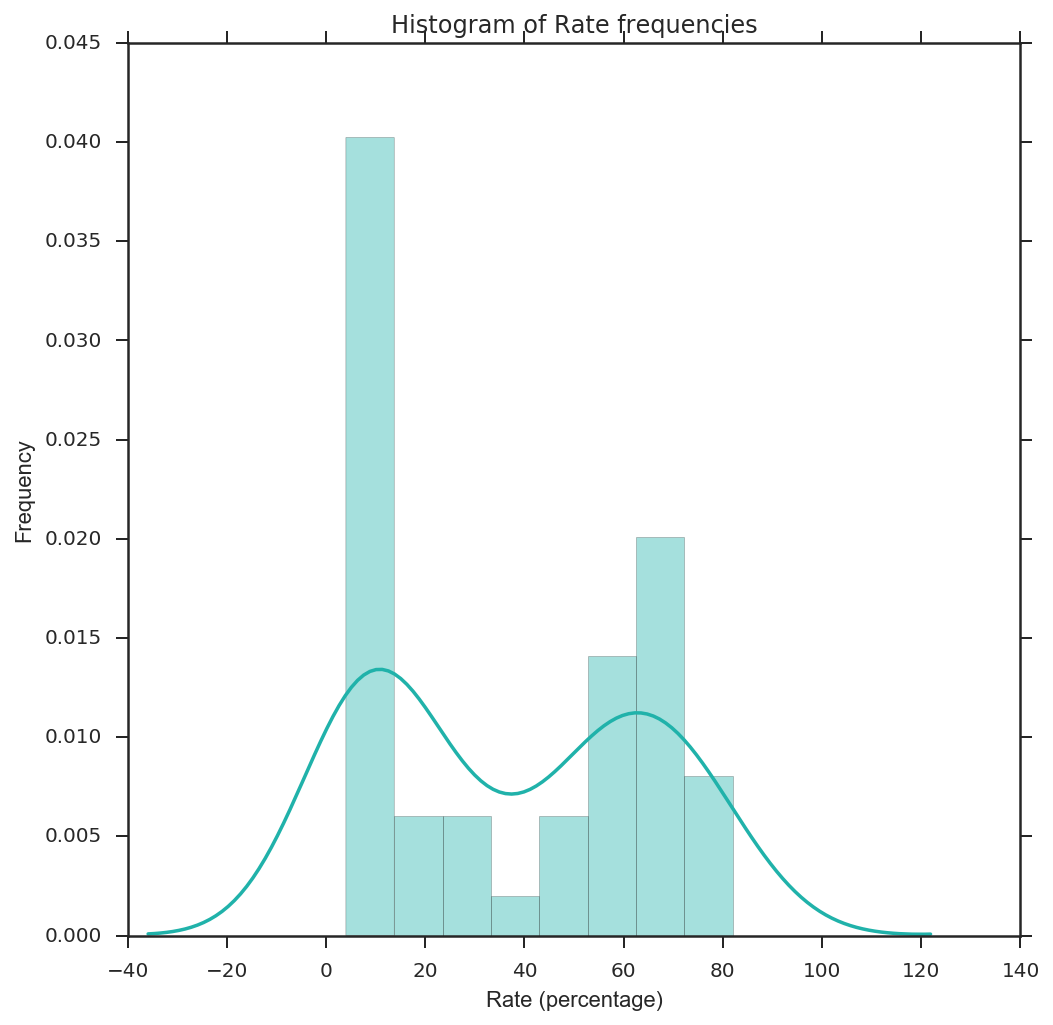

In [282]:
fig = plt.figure(figsize=(8,8))
sns.set_style('ticks')
plt.title('Histogram of Rate frequencies')
sns.distplot(minus_all.Rate, bins=8, kde=True, color='lightseagreen')
plt.ylabel('Frequency')
plt.xlabel('Rate (percentage)')

>There seems to be 2 peaks corresponding to both ends of the histogram making it seem U-shaped. There is a notably high number of values within the 4 - 13 percent range

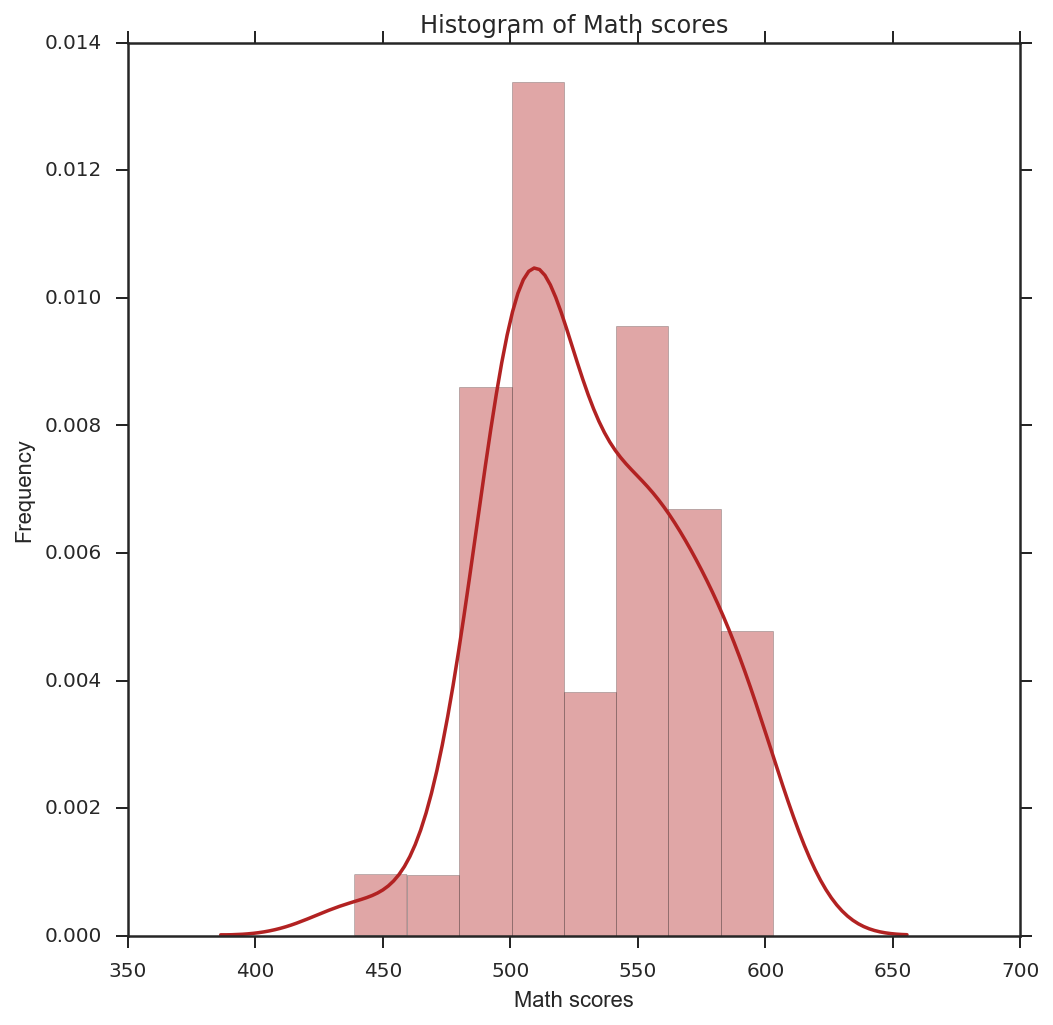

In [279]:
fig = plt.figure(figsize=(8,8))
sns.set_style('ticks')
plt.title('Histogram of Math scores')
sns.distplot(minus_all.Math, bins=8, kde=True, color='firebrick')
plt.ylabel('Frequency')
plt.xlabel('Math scores')

>There seems to be 2 peaks corresponding to Math scores of 520 and 550 with a gap between them at 530.

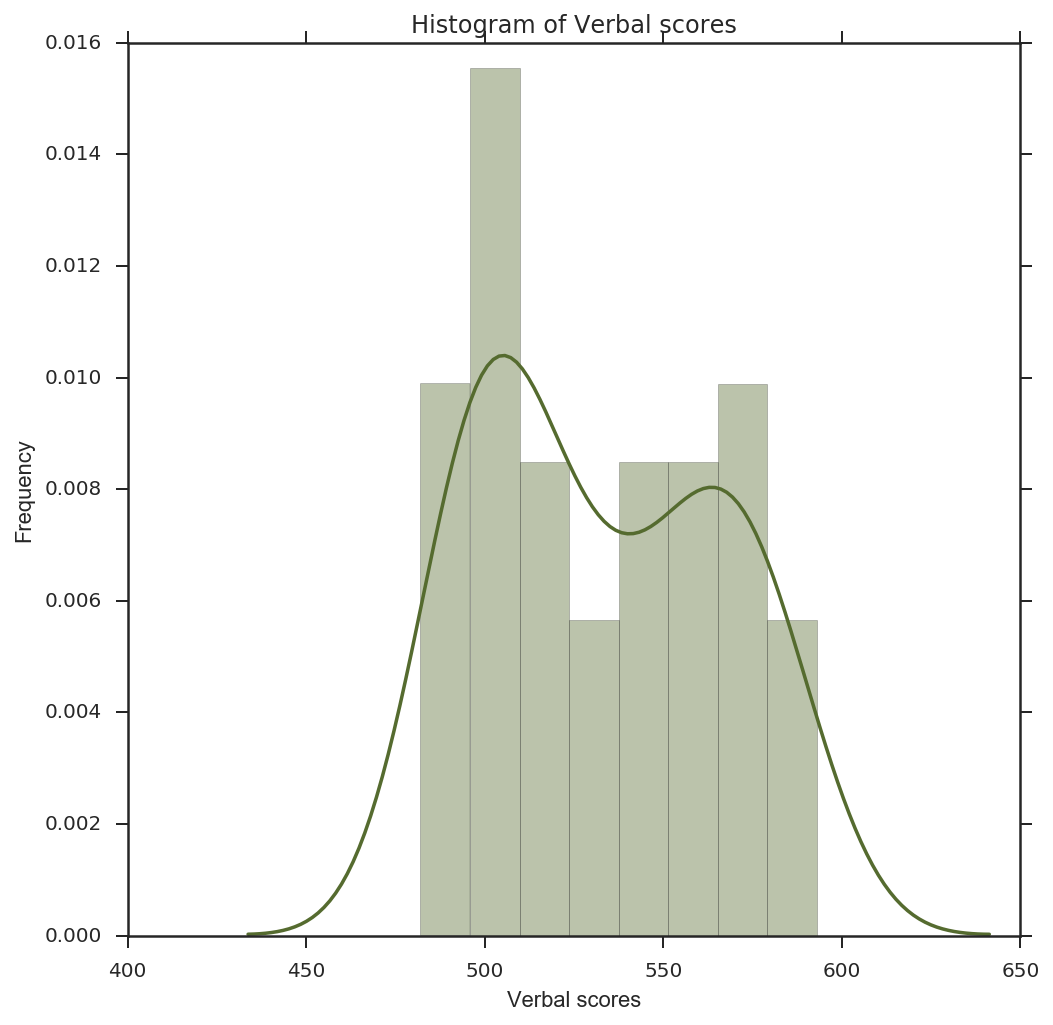

In [280]:
fig = plt.figure(figsize=(8,8))
sns.set_style('ticks')
plt.title('Histogram of Verbal scores')
sns.distplot(minus_all.Verbal, bins=8, kde=True, color='darkolivegreen')
plt.ylabel('Frequency')
plt.xlabel('Verbal scores')

>The verbal scores seem generally uniformly distributed with a noticeable increase in frequency at the 500 mark

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

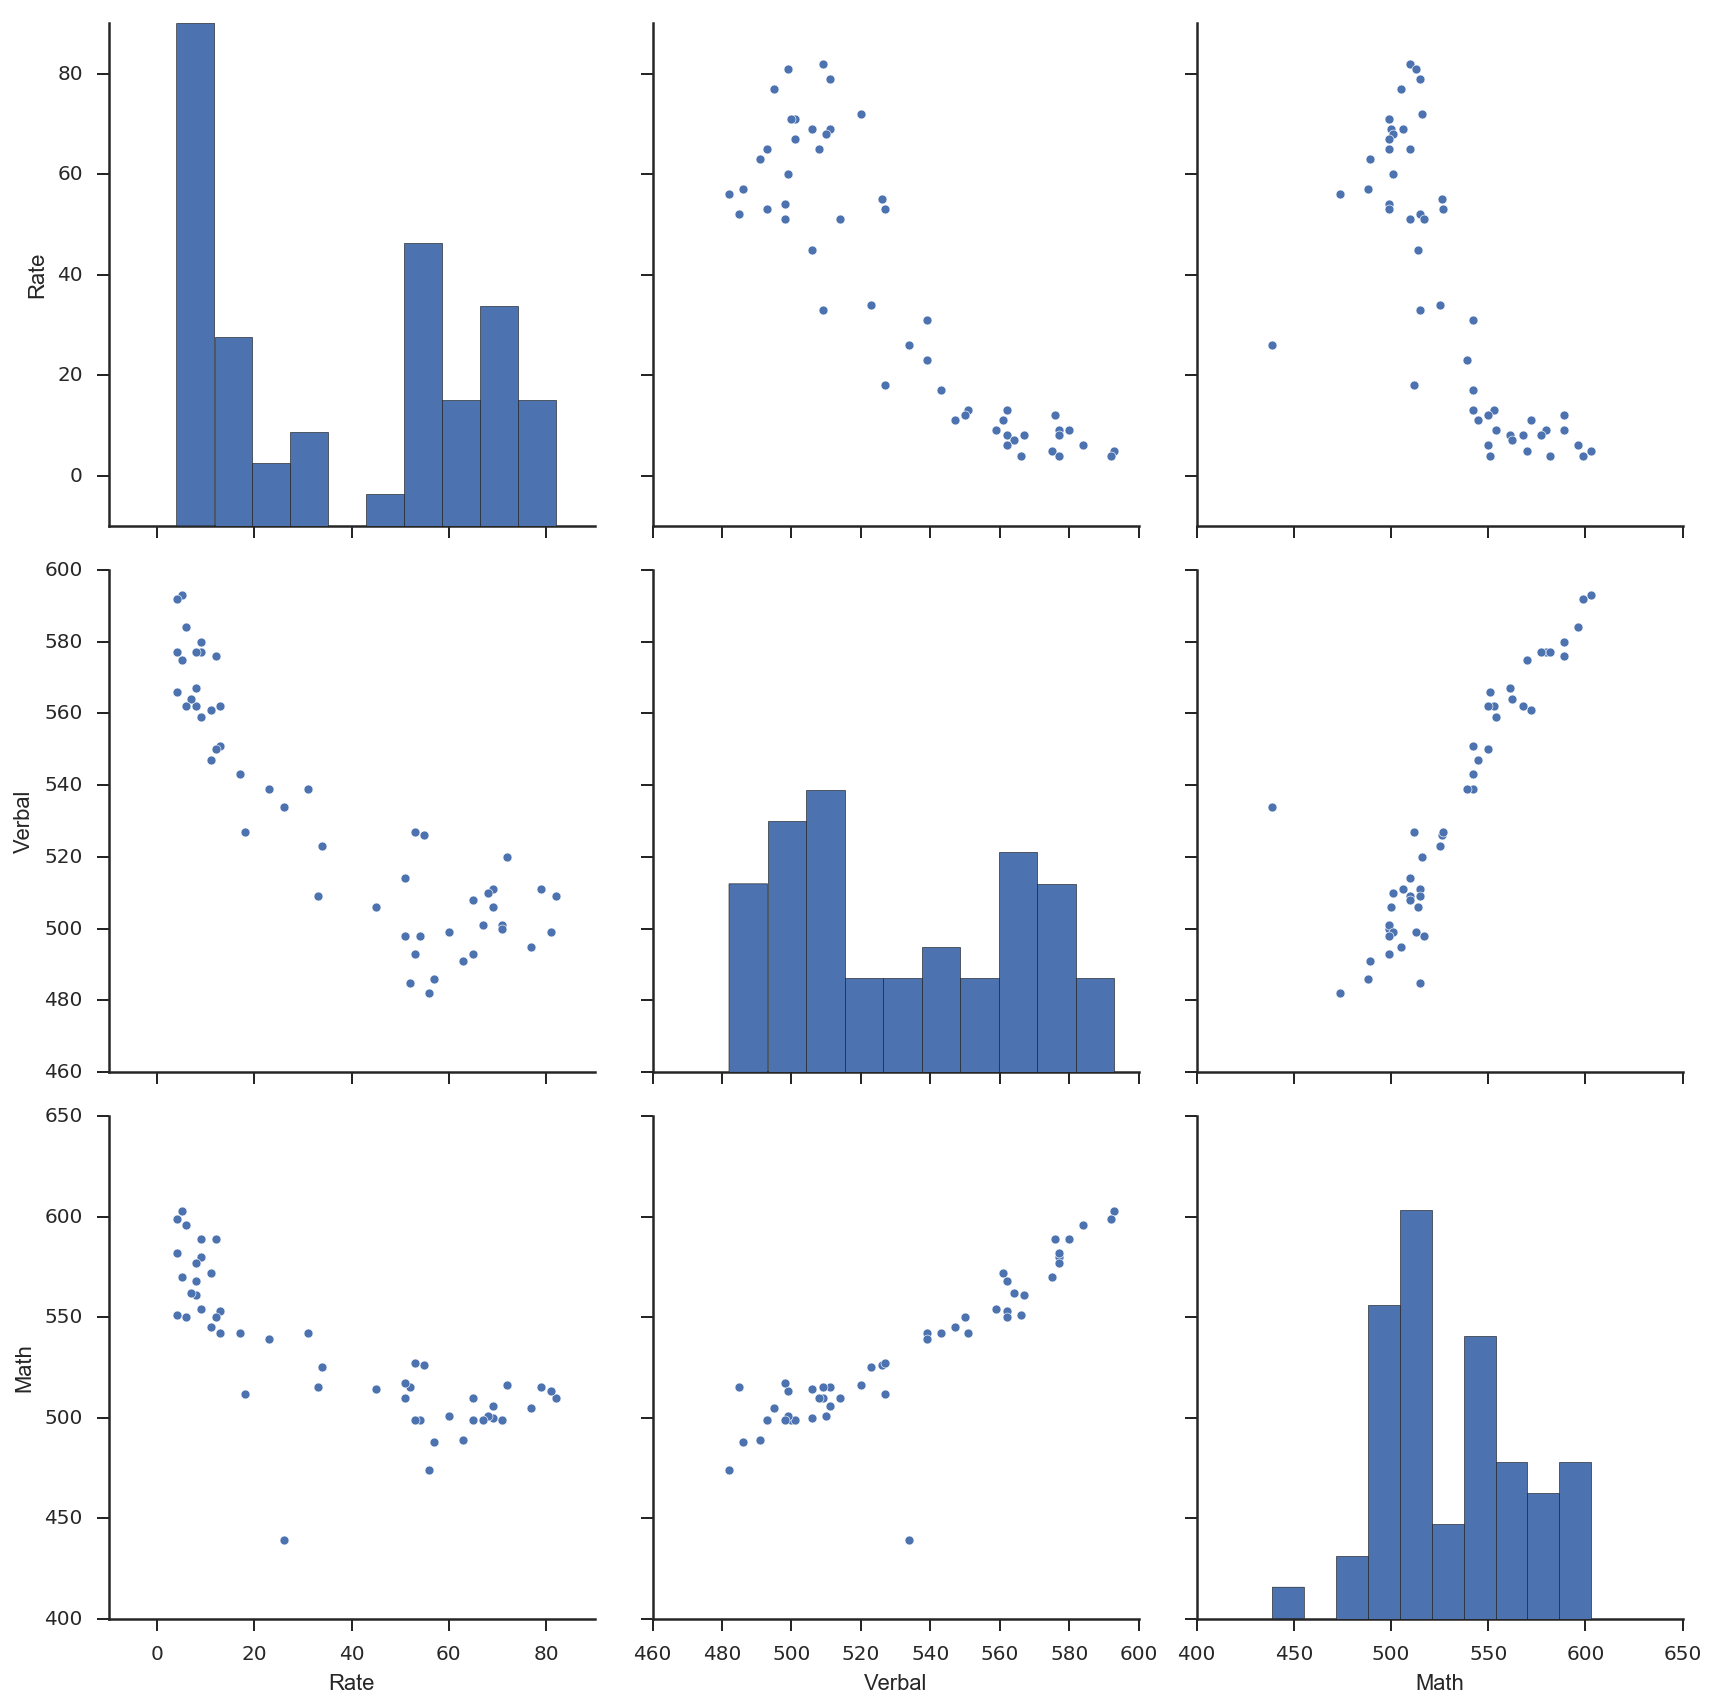

In [231]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_read, size=4)

>The Verbal and Math scores seem to be highly positively correlated with just one outlier and a small spread. This suggests that states with higher Verbal scores tend to score high in their Math scores as well.

>Rate on the other hand looks to be negatively correlated to both Verbal and Math scores with the former being of a greater magnitude. The spread of the datapoints also do not seem to be as tight as that seen in the Verbal-Math scatterplot. This suggests that states with a higher participation rate in the SATs by their eligible seniors tend to bring the overall average down for both Math and Verbal scores in their states.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

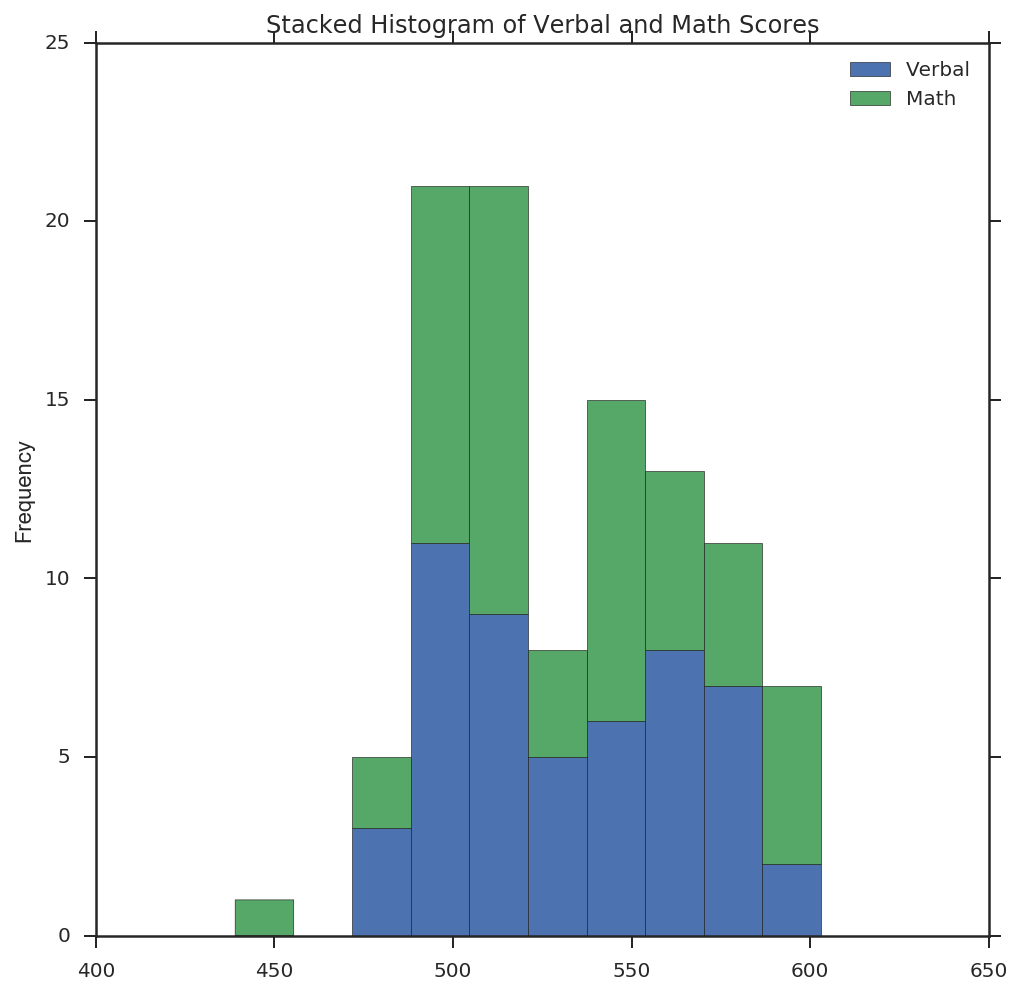

In [232]:
minus_all[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(8,8), title='Stacked Histogram of Verbal and Math Scores')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
>A boxplot shows a visual summary of the descriptive statistics of a variable in a glance. The mean, median, interquartile range and the spread of minimum and maximum values can be visually compared across different features for making quick judgement on the relative spread and skewness of the data. Scatterplots on the other hand are for quickly deciphering the correlation between 2 variables while a histogram is best used for determining the distribution and skewness of a single variable.

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?
>'Rate' is on a different scale (0-100) vs 'Verbal' and 'Math' (400 - 800). Plotting 'Rate' on the same chart will result in an unsightly compression of the box plots leading to lower visual acuity for meaningful comprehension.

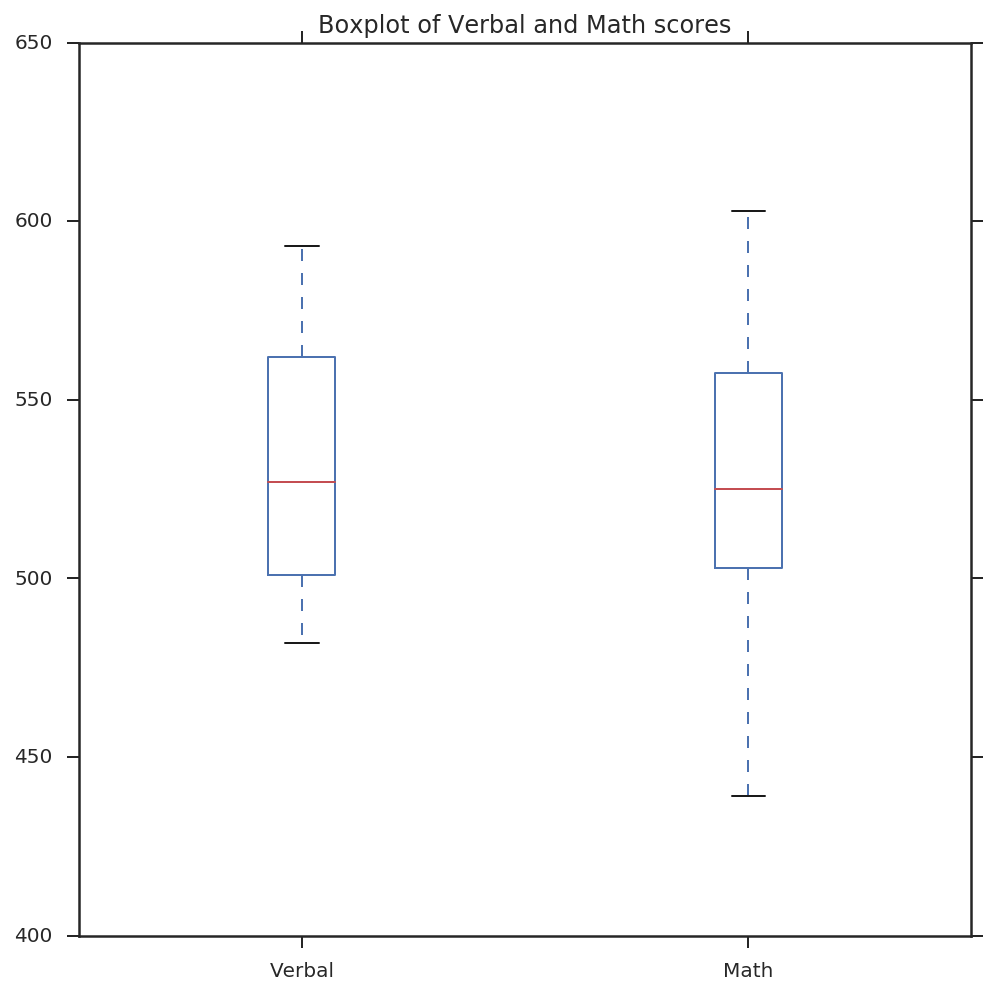

In [233]:
minus_all[['Verbal', 'Math']].plot(kind='box', figsize=(8,8), title='Boxplot of Verbal and Math scores')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [234]:
#Create a new dataframe without the State variable in order to perform arithmetic operations for normalization
minus_all_state = minus_all.drop('State', axis=1)
minus_all_state

,Rate,Verbal,Math
0,82,509,510
1,81,499,513
2,79,511,515
3,77,495,505
4,72,520,516
5,71,501,499
6,71,500,499
7,69,511,506
8,69,506,500
9,68,510,501


In [235]:
#Standardize the 3 variables by setting mean to 0 and standard deviation to 1
minus_all_stand = (minus_all_state-minus_all_state.mean())/minus_all_state.std()

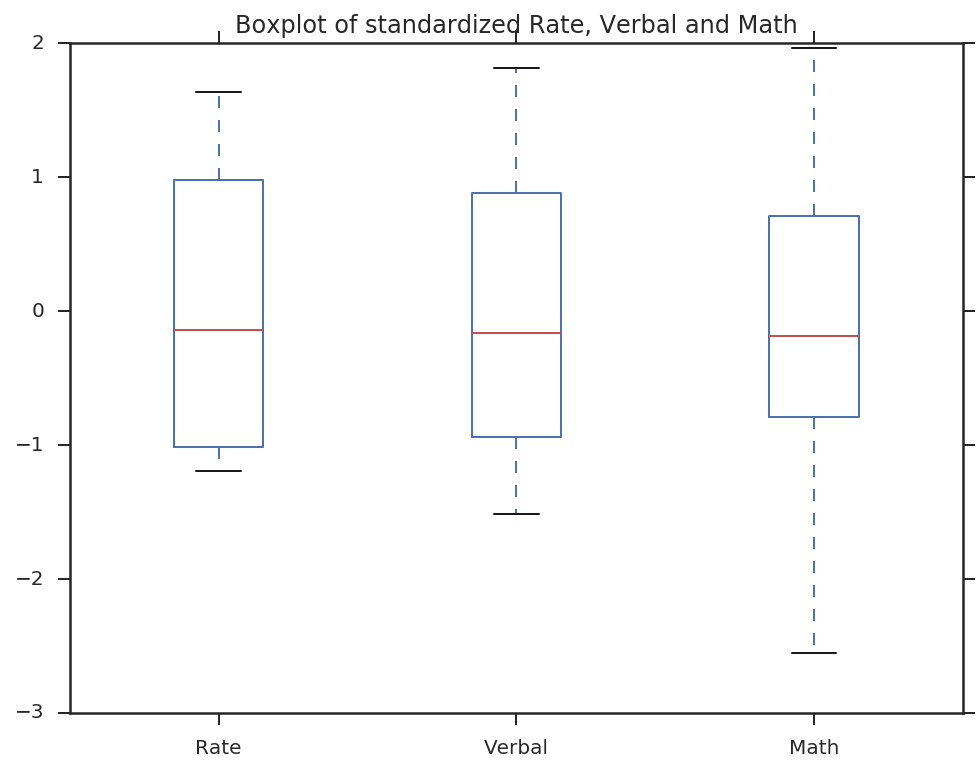

In [236]:
minus_all_stand.plot(kind='box', title='Boxplot of standardized Rate, Verbal and Math', figsize=(8,6))

>By standardizing the variables on the same scale of mean 0 and standard deviation 1, we are able to look at the distribution of their boxplots and appreciate their differences. It seems that Math has the widest spread of datapoints while 'Rate' has the smallest and yet, its interquartile range is the largest among the 3 variables. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [246]:
print "Average Verbal Score:", minus_all['Verbal'].mean()
print minus_all[minus_all['Verbal'] > minus_all['Verbal'].mean()][['State']].count()
minus_all[minus_all['Verbal'] > minus_all['Verbal'].mean()][['State', 'Verbal']]

Average Verbal Score: 532.529411765
State    24
dtype: int64


,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550
35,WY,547
36,MI,561


>There are 24 states above the mean, meaning that with 27 states below the mean, Verbal scores are normally distributed with a slight positive skew

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [250]:

print "Median Verbal scores: ", minus_all['Verbal'].median()
print "No. of states greater than median: ",minus_all[minus_all['Verbal'] > minus_all['Verbal'].median()][['State']].count()
print "No. of states less than median: ", minus_all[minus_all['Verbal'] < minus_all['Verbal'].median()][['State']].count()
print "No. of states exactly median: ", minus_all[minus_all['Verbal'] == minus_all['Verbal'].median()][['State']].count()
minus_all[minus_all['Verbal'] > minus_all['Verbal'].median()][['State', 'Verbal']]

Median Verbal scores:  527.0
No. of states greater than median:  State    24
dtype: int64
No. of states less than median:  State    25
dtype: int64
No. of states exactly median State    2
dtype: int64


,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550
35,WY,547
36,MI,561


>I expected the number of states to be greater than median to be exactly 25 given we have 51 obeservations. The result of Median being the same as Mean at 24 was rather surprising. Upon closer inspection, we have 2 states that have the exact same score at the median which explains the discrepancy.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [239]:
minus_all['Difference'] = minus_all['Verbal'] - minus_all['Math']
minus_all

/Users/timmoti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [240]:
sorted_Verbal_larger = minus_all.sort_values('Difference', ascending=False).iloc[: 10]
sorted_Verbal_larger.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [241]:
sorted_Math_larger = minus_all.sort_values('Difference').iloc[:10]
sorted_Math_larger.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [242]:
minus_all_state.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


>The correlation matrix suggests that 'Verbal' and 'Math' are highly positively correlated while 'Rate' is highly negatively correlated against both 'Verbal' and 'Math'. This corroborates with our visual analysis earlier in the pairplot

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [243]:
minus_all.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


- count depicts the number of observations or datapoints
- mean is the average value obtained by dividing the sum of all values by the number of datapoints
- std is the standard deviation that suggests the spread of the data from the mean
- min is the value of the smallest datapoint recorded within the variable
- 25% is the value at the 25th percentile of all datapoints recorded within the variable
- 50% is the median or the value of the 50th percentile
- 75% is the value at the 75th percentile of all datapoints recorded within the variable
- max is the value of the largest datapoint recorded within the variable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [244]:
minus_all_state.cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


### How is the covariance matrix different from the correlation matrix?
The correlation matrix has the value of 1 across its diagonal since a variable measured against itself is always 100% correlated and is not a meaningful point of comparison. The other values of the correlation matrix range between -1 to 1 where values closer to 1 indicate higher correlation between the variables while negative values suggest negative correlation and the opposite is true. The covariance matrix has negative values for negative covariance similar to the correlation matrix but its values are much larger in comparison. The reason for this is because it is yet to be scaled and adjusted for individual variances, resulting in the the values along the diagonal representing variances of the individual variables.

### Process to convert covariance to correlation
The formula to convert covariance matrix , C, to correlation matrix, R, is given as":
![Covariance-Correlation Formula](covcorformula.png)
For 2 variables i and j, calculate the correlation by dividing the Covariance of i,j by the square root of the product of their variances.

### Preference for correlation matrix over covariance matrix for examining relationships in data
We use the correlation matrix for examining data as it is scaled to the variances of the individual variables and can be used to compare how the different variables in our dataset relate to each other. It basically gives us a basis for comparison within our data versus the covariance matrix which does not.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [327]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs.head(1)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0


In [328]:
drugs.tail(1)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [258]:
drugs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

>There are 17 observations in the dataset and looking down the rows, there doesn't seem to be any null values. However, there seems to be some datatypes that should be float datatypes but are classified as strings(object)

In [257]:
drugs.isnull().sum() 

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

>Performing another check confirms that all variables do not have missing values

In [492]:
#Renamed n to number_of_pax, replaced '-' with '_' and changed 'use' to 'pct' for clearer understanding of the values
drugs.rename(columns=(lambda x:x.replace('-', '_')), inplace=True)
drugs.rename(columns = {'n':'number_of_pax'}, inplace=True)
drugs.rename(columns=(lambda x:x.replace('use', 'pct')), inplace=True)

In [493]:
drugs

,age,number_of_pax,alcohol_pct,alcohol_frequency,marijuana_pct,marijuana_frequency,cocaine_pct,cocaine_frequency,crack_pct,crack_frequency,...,oxycontin_pct,oxycontin_frequency,tranquilizer_pct,tranquilizer_frequency,stimulant_pct,stimulant_frequency,meth_pct,meth_frequency,sedative_pct,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


>Tried to convert all columns to float datatype but couldn't. Upon closer inspection, the reason why they are registered as strings is because of a '-' value at certain columns at the row containing Age 65+

In [494]:
#Replaced all '-' value with 0
drugs = drugs.apply(lambda x:x.replace('-', 0))

In [495]:
drugs

,age,number_of_pax,alcohol_pct,alcohol_frequency,marijuana_pct,marijuana_frequency,cocaine_pct,cocaine_frequency,crack_pct,crack_frequency,...,oxycontin_pct,oxycontin_frequency,tranquilizer_pct,tranquilizer_frequency,stimulant_pct,stimulant_frequency,meth_pct,meth_frequency,sedative_pct,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [496]:
#Converted remaining columns, previously containing the '-' value and now replaced by a 0, to floats
for col in['cocaine_frequency', 'crack_frequency', 'heroin_frequency', 'inhalant_frequency', 'oxycontin_frequency', 'meth_frequency']:
    drugs[col] = drugs[col].astype(float)

In [497]:
#Datatypes all look good except for the fact that age is an object. But it has to be as the column contains rows with
#age ranges and thus makes use of '-' and '+' characters
drugs.dtypes

age                         object
number_of_pax                int64
alcohol_pct                float64
alcohol_frequency          float64
marijuana_pct              float64
marijuana_frequency        float64
cocaine_pct                float64
cocaine_frequency          float64
crack_pct                  float64
crack_frequency            float64
heroin_pct                 float64
heroin_frequency           float64
hallucinogen_pct           float64
hallucinogen_frequency     float64
inhalant_pct               float64
inhalant_frequency         float64
pain_reliever_pct          float64
pain_reliever_frequency    float64
oxycontin_pct              float64
oxycontin_frequency        float64
tranquilizer_pct           float64
tranquilizer_frequency     float64
stimulant_pct              float64
stimulant_frequency        float64
meth_pct                   float64
meth_frequency             float64
sedative_pct               float64
sedative_frequency         float64
dtype: object

In [498]:
#Realized pain-reliever was misspelled
drugs.rename(columns={"pain_releiver_use": "pain_reliever_use", "pain_releiver_frequency":"pain_reliever_frequency"}, inplace=True)

In [499]:
#Everything looks ok now
drugs.columns

Index([u'age', u'number_of_pax', u'alcohol_pct', u'alcohol_frequency',
       u'marijuana_pct', u'marijuana_frequency', u'cocaine_pct',
       u'cocaine_frequency', u'crack_pct', u'crack_frequency', u'heroin_pct',
       u'heroin_frequency', u'hallucinogen_pct', u'hallucinogen_frequency',
       u'inhalant_pct', u'inhalant_frequency', u'pain_reliever_pct',
       u'pain_reliever_frequency', u'oxycontin_pct', u'oxycontin_frequency',
       u'tranquilizer_pct', u'tranquilizer_frequency', u'stimulant_pct',
       u'stimulant_frequency', u'meth_pct', u'meth_frequency', u'sedative_pct',
       u'sedative_frequency'],
      dtype='object')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [500]:
#Let's take a look at a summary of the descriptive statistics
drugs.describe()

,number_of_pax,alcohol_pct,alcohol_frequency,marijuana_pct,marijuana_frequency,cocaine_pct,cocaine_frequency,crack_pct,crack_frequency,heroin_pct,...,oxycontin_pct,oxycontin_frequency,tranquilizer_pct,tranquilizer_frequency,stimulant_pct,stimulant_frequency,meth_pct,meth_frequency,sedative_pct,sedative_frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


>Not very useful as it is too long at 27 columns. It would be good to seperate into 2 smaller dataframes, one containing just the percentages and the other just the median frequencies

In [501]:
drugs.head(1)

,age,number_of_pax,alcohol_pct,alcohol_frequency,marijuana_pct,marijuana_frequency,cocaine_pct,cocaine_frequency,crack_pct,crack_frequency,...,oxycontin_pct,oxycontin_frequency,tranquilizer_pct,tranquilizer_frequency,stimulant_pct,stimulant_frequency,meth_pct,meth_frequency,sedative_pct,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0


In [502]:
#Extract columns with percentages out to a new dataframe
drugs_pct = drugs.iloc[:,[0,1,2,4,6,8,10,12,14,16,18,20,22,24,26]]
drugs_pct

,age,number_of_pax,alcohol_pct,marijuana_pct,cocaine_pct,crack_pct,heroin_pct,hallucinogen_pct,inhalant_pct,pain_reliever_pct,oxycontin_pct,tranquilizer_pct,stimulant_pct,meth_pct,sedative_pct
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [503]:
#Extract columns with frequency to a new dataframe
drugs_freq = drugs.iloc[:, [0,1,3,5,7,9,11,13,15,17,19,21,23,25,27]]
drugs_freq

,age,number_of_pax,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_reliever_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
0,12,2798,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,2757,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,2792,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,3038,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,2469,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,2223,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,20,2271,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,2354,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


In [504]:
#For an overview of all percentages to explore meaningful correlations
drugs_pct.describe()

,number_of_pax,alcohol_pct,marijuana_pct,cocaine_pct,crack_pct,heroin_pct,hallucinogen_pct,inhalant_pct,pain_reliever_pct,oxycontin_pct,tranquilizer_pct,stimulant_pct,meth_pct,sedative_pct
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,1297.890426,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,2223.000000,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,2469.000000,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,2798.000000,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,3058.000000,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,7391.000000,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


>Looking at the summary, we can see that alcohol and marijuana have substantially higher values than the other types of drug percentages. We can build a normalized boxplot for further analysis

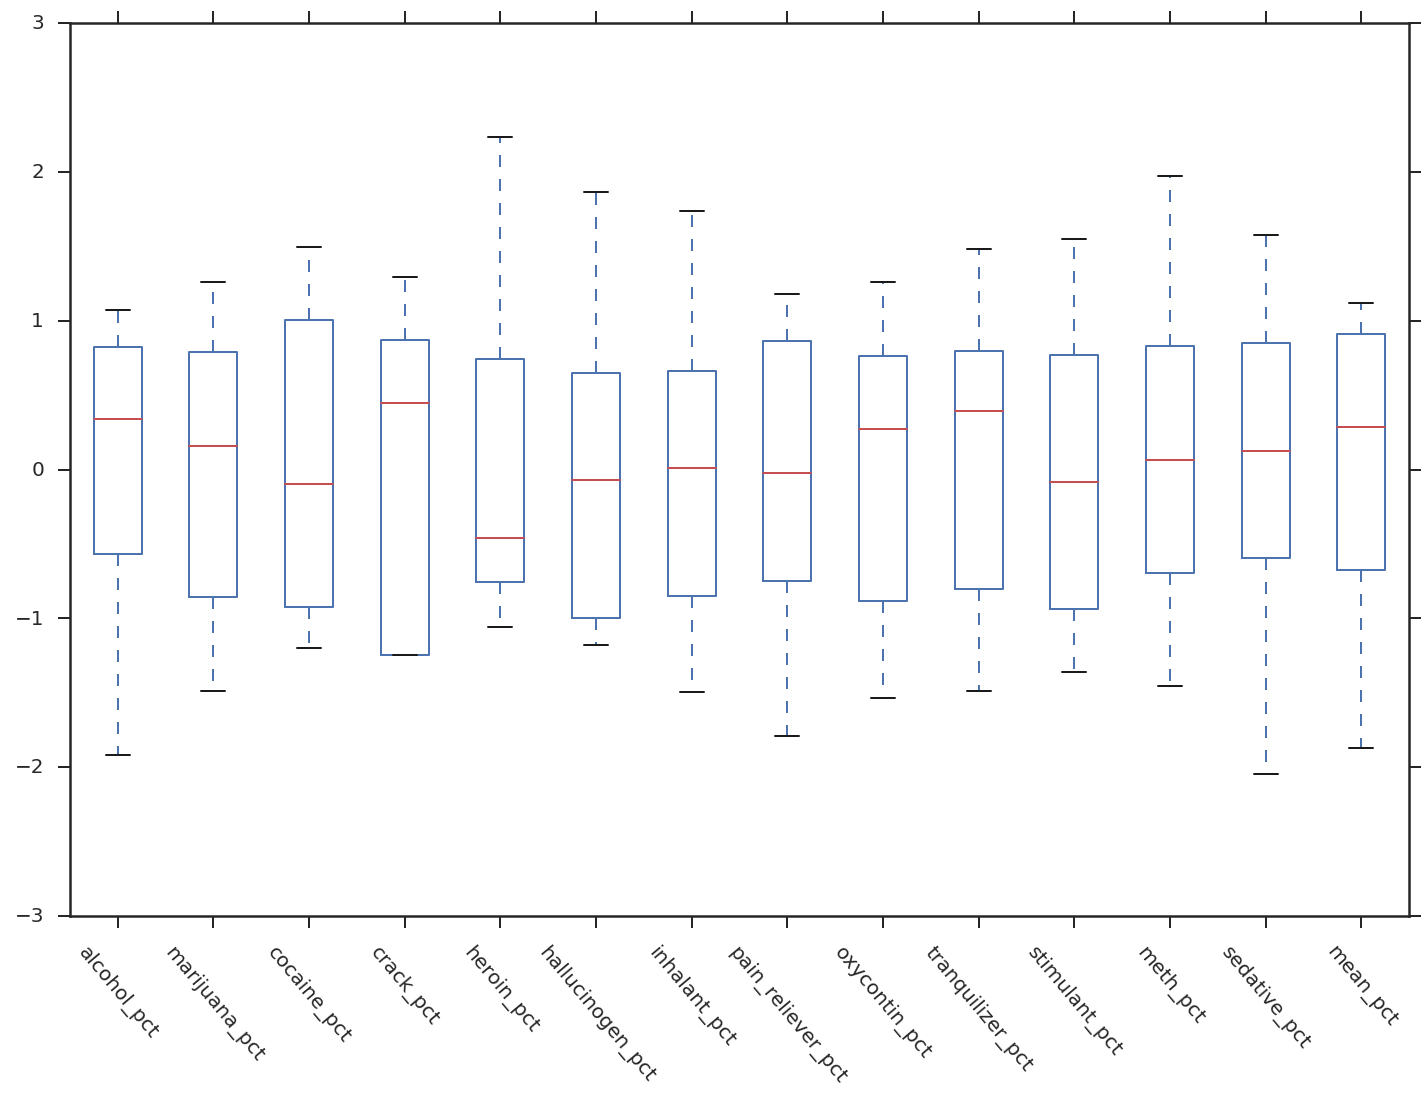

In [589]:
a=drugs_pct.drop(['number_of_pax', 'age'], axis=1)
#a.rename(columns = a.iloc[0], inplace=True)
#a.drop(['age'], inplace=True)
b = (a-a.mean())/a.std()
b.plot(kind='box', figsize=(12,8), rot=-50)

>The interquartile ranges look to be very similar across the various drug classes. Some of the drug class percentages seem to have a normal distribution like stimulant, meth and marijuana. Heroin looks to be the most highly skewed with a median very close to the lower quartile and an exceptionally long upper whisker

## Age group that consumes the most drugs

In [578]:
#Create new column to calculate mean percentage across all percentage of drug use by age group
drugs_pct['mean_pct'] = drugs_pct.iloc[:, 2:].mean(axis=1)
drugs_pct

/Users/timmoti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,age,number_of_pax,alcohol_pct,marijuana_pct,cocaine_pct,crack_pct,heroin_pct,hallucinogen_pct,inhalant_pct,pain_reliever_pct,oxycontin_pct,tranquilizer_pct,stimulant_pct,meth_pct,sedative_pct,mean_pct
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,1.395330
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,1.781044
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,3.107143
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,4.747802
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,6.614560
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5,8.320604
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4,9.830495
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3,10.988736
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5,11.133242
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3,11.652473


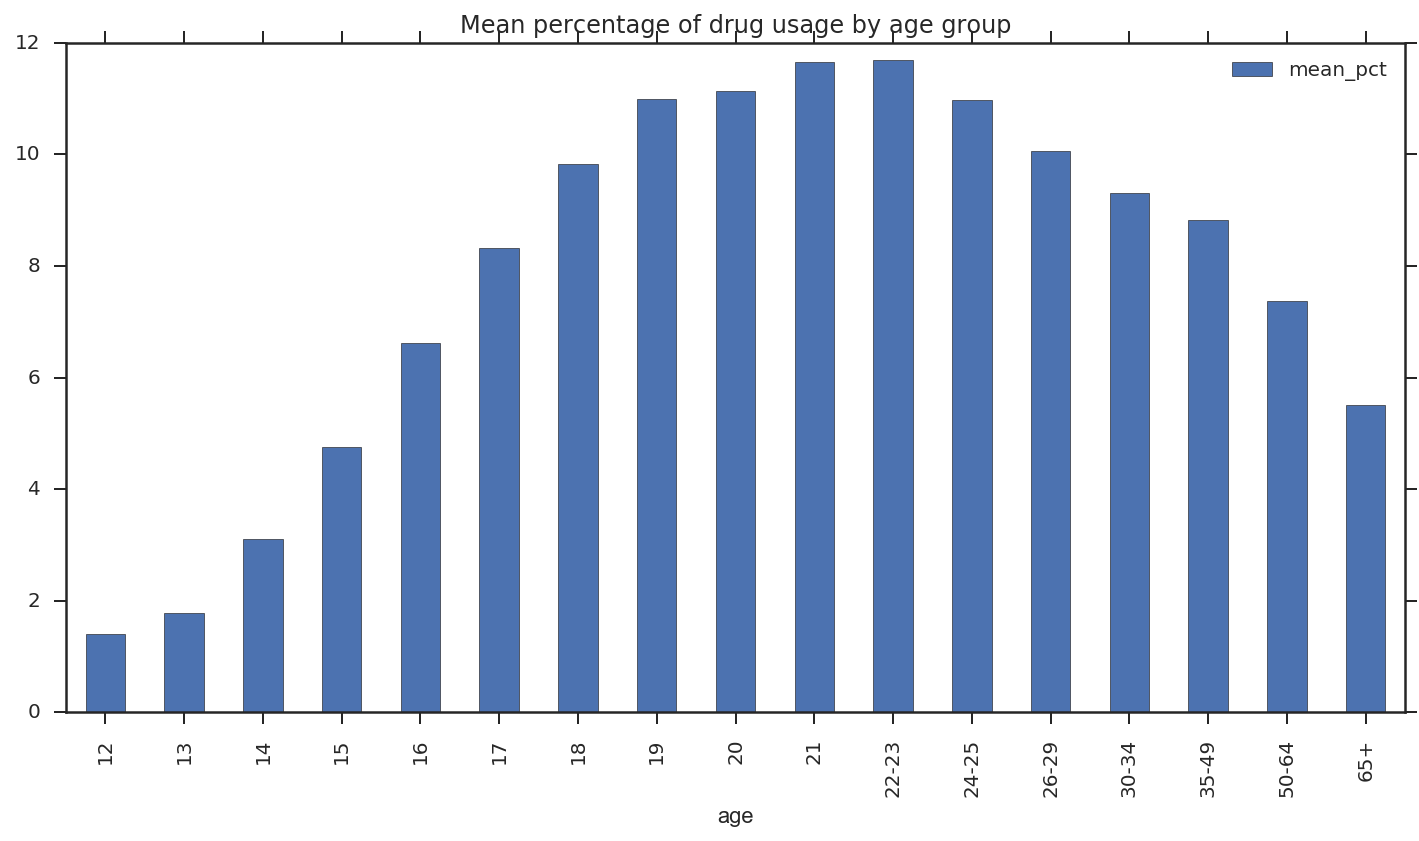

In [584]:
drugs_pct.plot(x='age', y='mean_pct', kind='bar', figsize=(12,6), title='Mean percentage of drug usage by age group')

>The age group that has the highest percentages of drug and alcohol users is between 21-23.

## Most frequent patterns of drugs of abuse among drug abusers

In [505]:
#To explore meaningful relationships among drug frequencies
drugs_freq.describe()

,number_of_pax,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_reliever_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,1297.890426,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,2223.000000,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,2469.000000,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,2798.000000,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,3058.000000,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,7391.000000,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


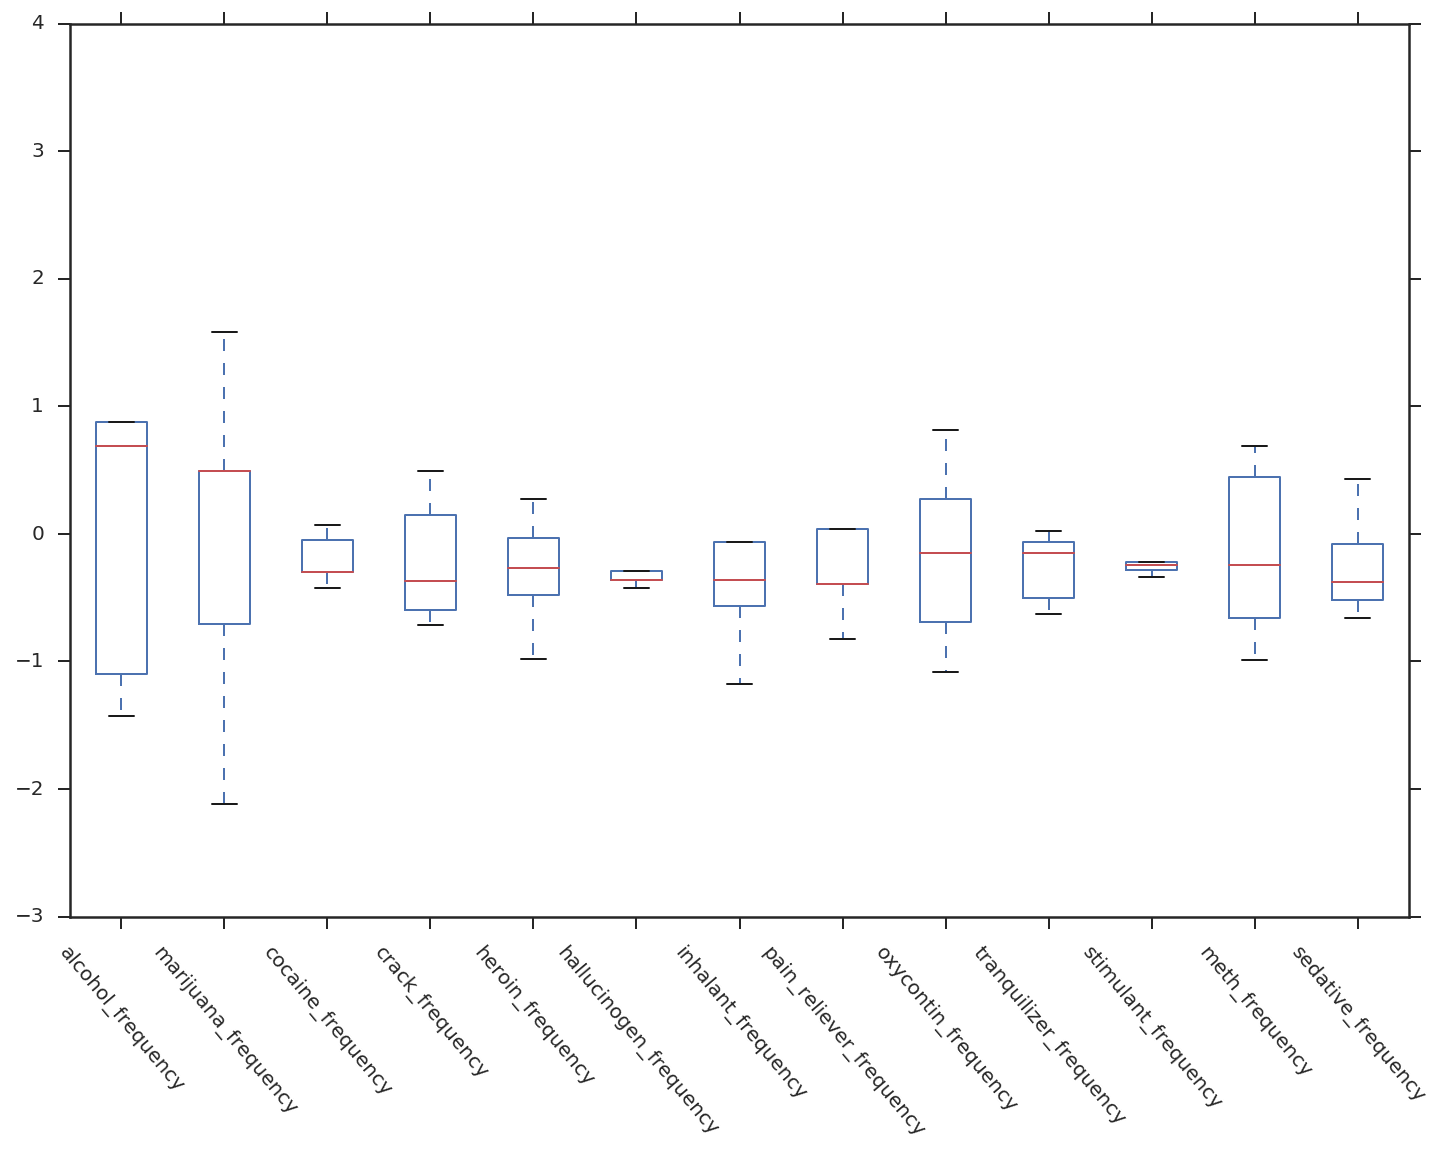

In [533]:
#Creating a normalized boxplot of the frequencies
c = drugs_freq.iloc[:,2:]
d = (c-c.mean())/c.std()
d.plot(kind='box', figsize=(12,8), rot=-50)

>The boxplots for the frequency values look more varied than those of the percentages. In particular, alcohol frequency has a very wide interquartile range and very short whiskers. Some plots, like that of stimulant and hallucinogen, have very small interquartile ranges and cannot be properly represented even after normalization.

In [506]:
#selecting just frequency values and calculating the mean across all age groups
freq_mean = drugs_freq.iloc[:,2:].mean()
freq_mean

alcohol_frequency          33.352941
marijuana_frequency        42.941176
cocaine_frequency           7.411765
crack_frequency            12.382353
heroin_frequency           68.970588
hallucinogen_frequency      8.411765
inhalant_frequency          5.794118
pain_reliever_frequency    14.705882
oxycontin_frequency        13.941176
tranquilizer_frequency     11.735294
stimulant_frequency        31.147059
meth_frequency             31.735294
sedative_frequency         19.382353
dtype: float64

In [507]:
#selecting just frequency values and calculating the median across all age groups
freq_median = drugs_freq.iloc[:, 2:].median()
freq_median

alcohol_frequency          48.0
marijuana_frequency        52.0
cocaine_frequency           5.0
crack_frequency             6.0
heroin_frequency           50.0
hallucinogen_frequency      3.0
inhalant_frequency          4.0
pain_reliever_frequency    12.0
oxycontin_frequency        12.0
tranquilizer_frequency     10.0
stimulant_frequency        10.0
meth_frequency             24.0
sedative_frequency         10.0
dtype: float64

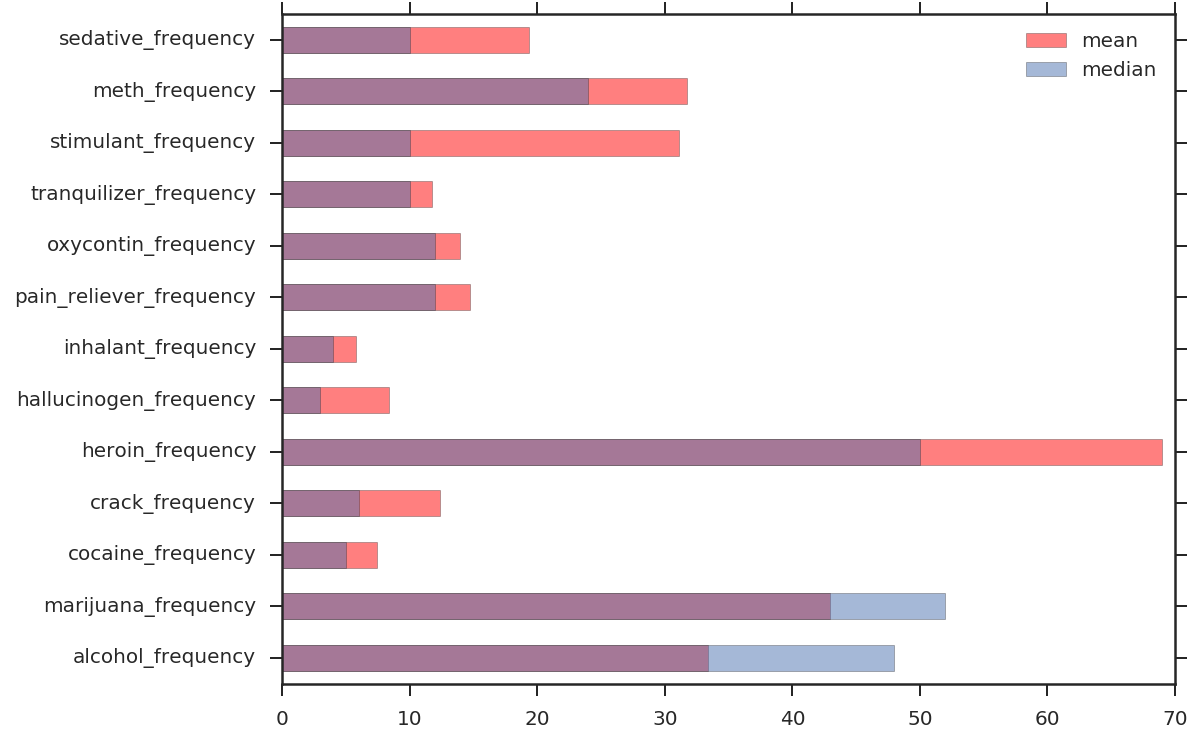

In [508]:
#plotting overlapping horizontal bars of mean and median of drug frequencies
ax=freq_mean.plot(kind='barh', color='red', alpha=0.5, legend=True, label='mean')
freq_median.plot(kind='barh', ax=ax, alpha=0.5, legend=True, label='median', figsize=(8,6))

>Looking at both mean and median of frequency of median drug usage in 12 months across all age groups, heroin registers the highest mean of about 69 times while the highest median goes to marijuana at 52 times. We notice some differences between mean and median among some of the drug classes as well

In [404]:
#create new df for mean and median of frequencies to find difference between mean and median
freq_mmd = pd.DataFrame([freq_mean, freq_median])
freq_mmd = freq_mmd.T
freq_mmd.columns = ['mean', 'median']
freq_mmd['difference'] = freq_mmd['mean']-freq_mmd['median']
freq_mmd.sort_values('difference', ascending = False)

,mean,median,difference
stimulant_frequency,31.147059,10.0,21.147059
heroin_frequency,68.970588,50.0,18.970588
sedative_frequency,19.382353,10.0,9.382353
meth_frequency,31.735294,24.0,7.735294
crack_frequency,12.382353,6.0,6.382353
hallucinogen_frequency,8.411765,3.0,5.411765
pain_reliever_frequency,14.705882,12.0,2.705882
cocaine_frequency,7.411765,5.0,2.411765
oxycontin_frequency,13.941176,12.0,1.941176
inhalant_frequency,5.794118,4.0,1.794118


>The greater the difference between the mean and the median, the more the data is skewed. We can observe that the difference is the greatest among the usage of stimulants followed by heroin and then alcohol looking at just the absolute values.

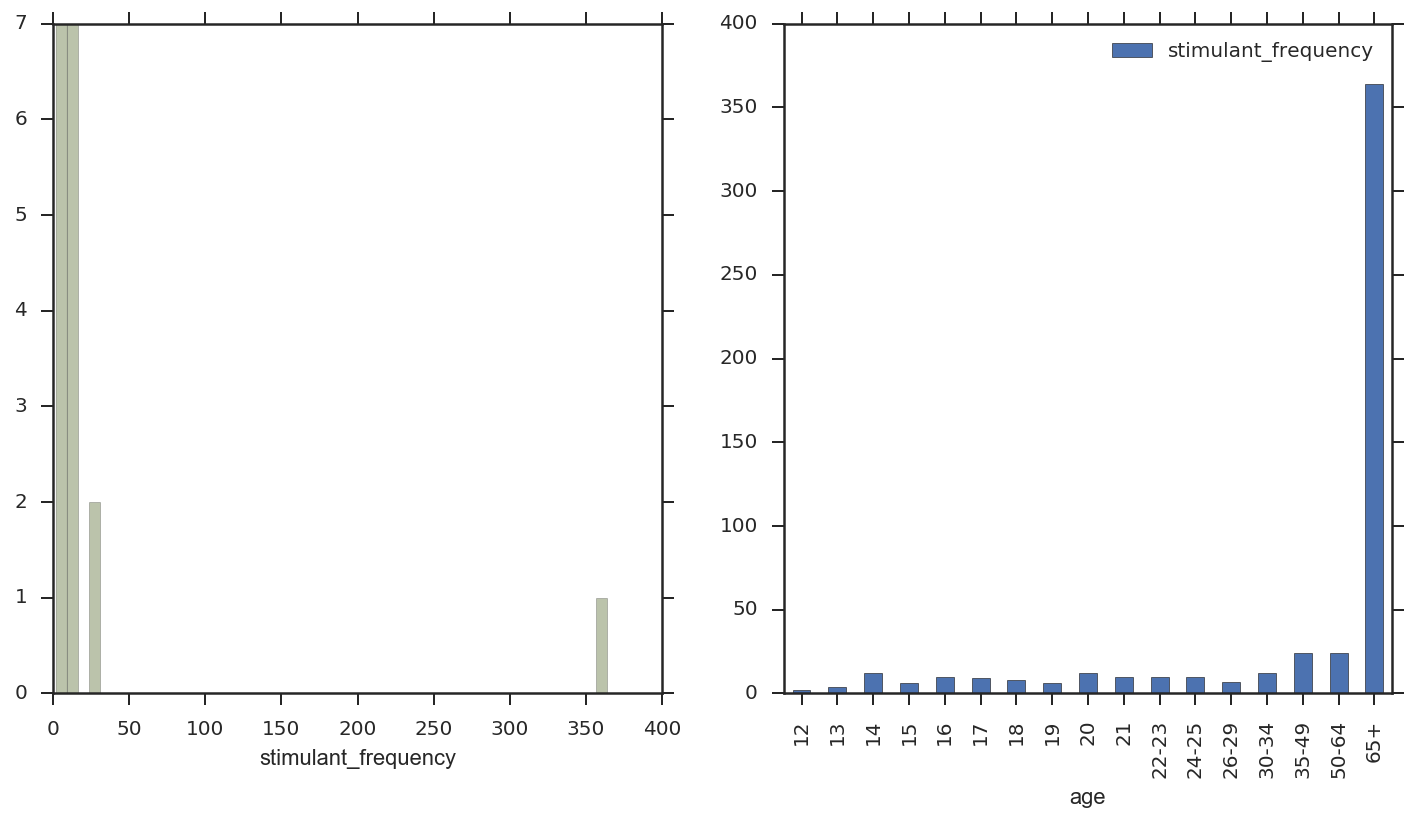

In [490]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(drugs_freq.stimulant_frequency, bins=50, kde=False, color='darkolivegreen', ax=ax[0])
drugs_freq.plot(x='age', y='stimulant_frequency', kind='bar', ax=ax[1])

>Upon a closer look at the data for stimulant frequencies, we realize that there is a very distinct outlier in the range of 360 median uses in the 12 month period. We identify this as the 65+ group in the bar plot

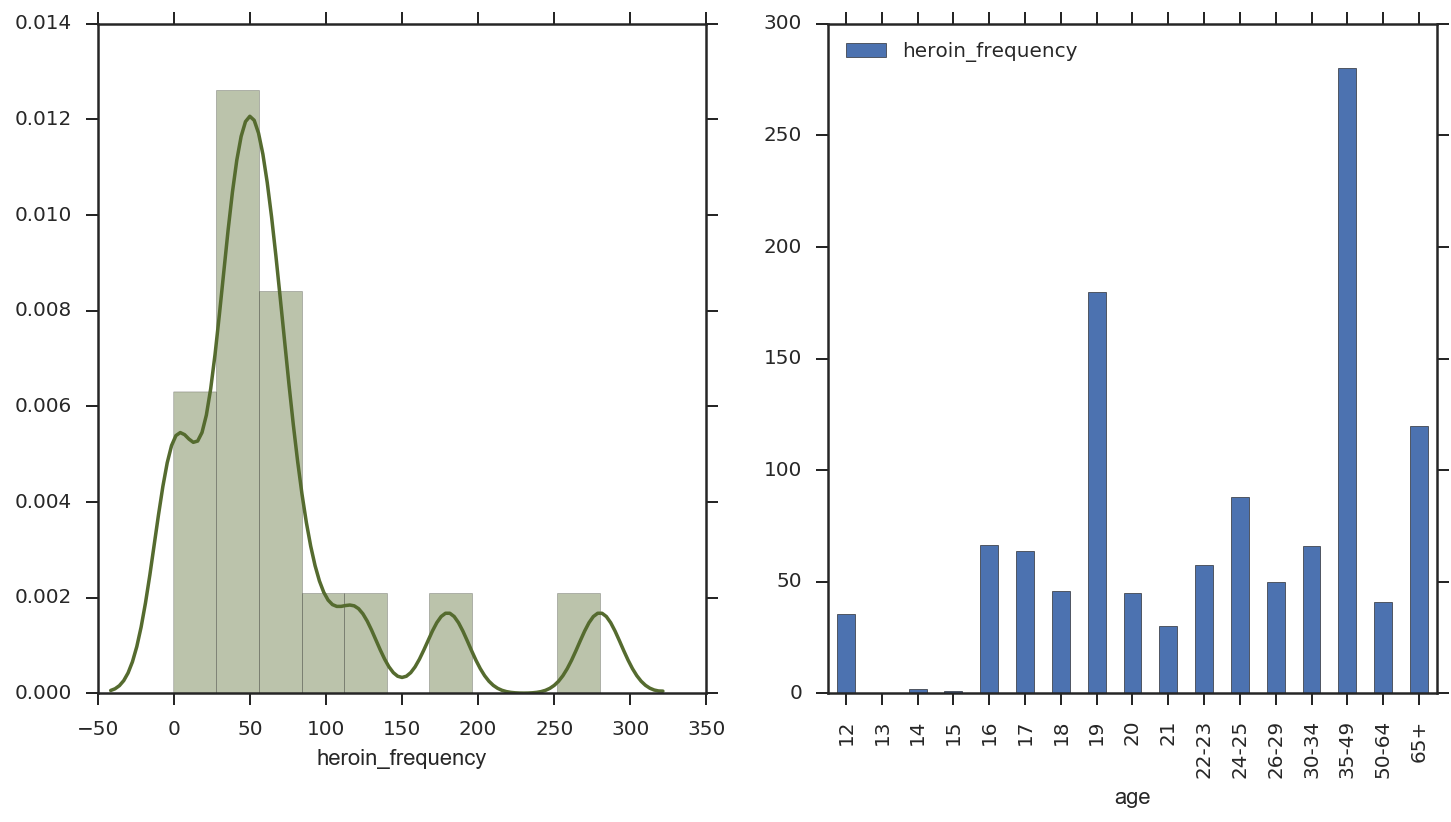

In [462]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(drugs_freq.heroin_frequency, bins=10, kde=True, color='darkolivegreen', ax=ax[0])
drugs_freq.plot(x='age', y='heroin_frequency', kind='bar', ax=ax[1])

>Looking at the histogram distribution for heroin, we can see a distinct positive skew and the presence of an outlier group between 250-300 median uses in the 12 month period. We identify this as the 35-49 age group from the bar plot

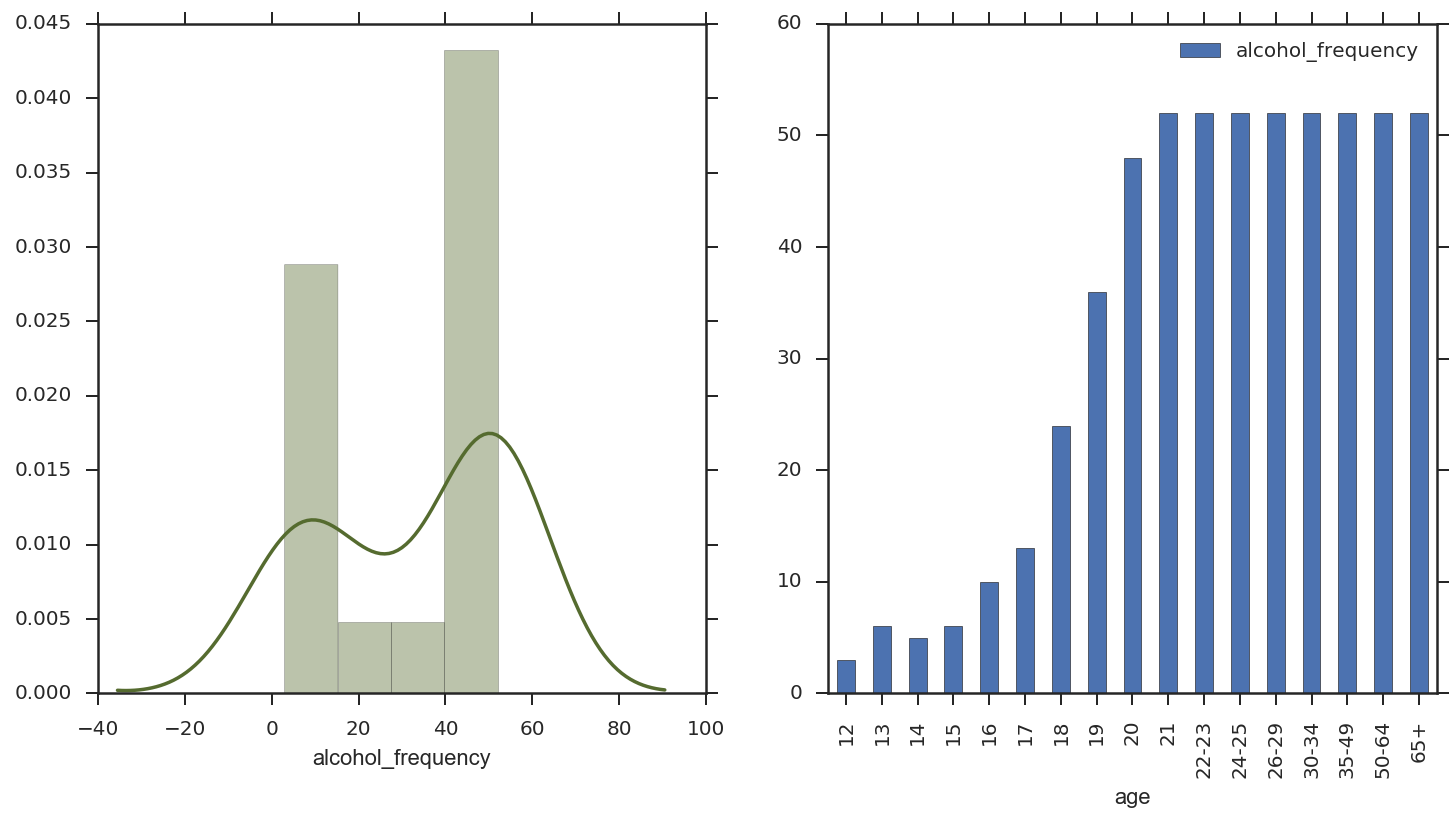

In [482]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(drugs_freq.alcohol_frequency, bins=4, kde=True, color='darkolivegreen', ax=ax[0])
drugs_freq.plot(x='age', y='alcohol_frequency', kind='bar', ax=ax[1])

>Alcohol use has 2 peaks, one lower than 20, and one around 50 as observed from the histogram. The bar chart clearly shows where both peaks are derived. 12-17 year olds minimally consume the substance but from 20 years old onwards, the amount of consumption is constant at 52 times a year. Even so, it is not the most highly abused substance but is consistently consumed in relatively high proportions across ages greater than 20.

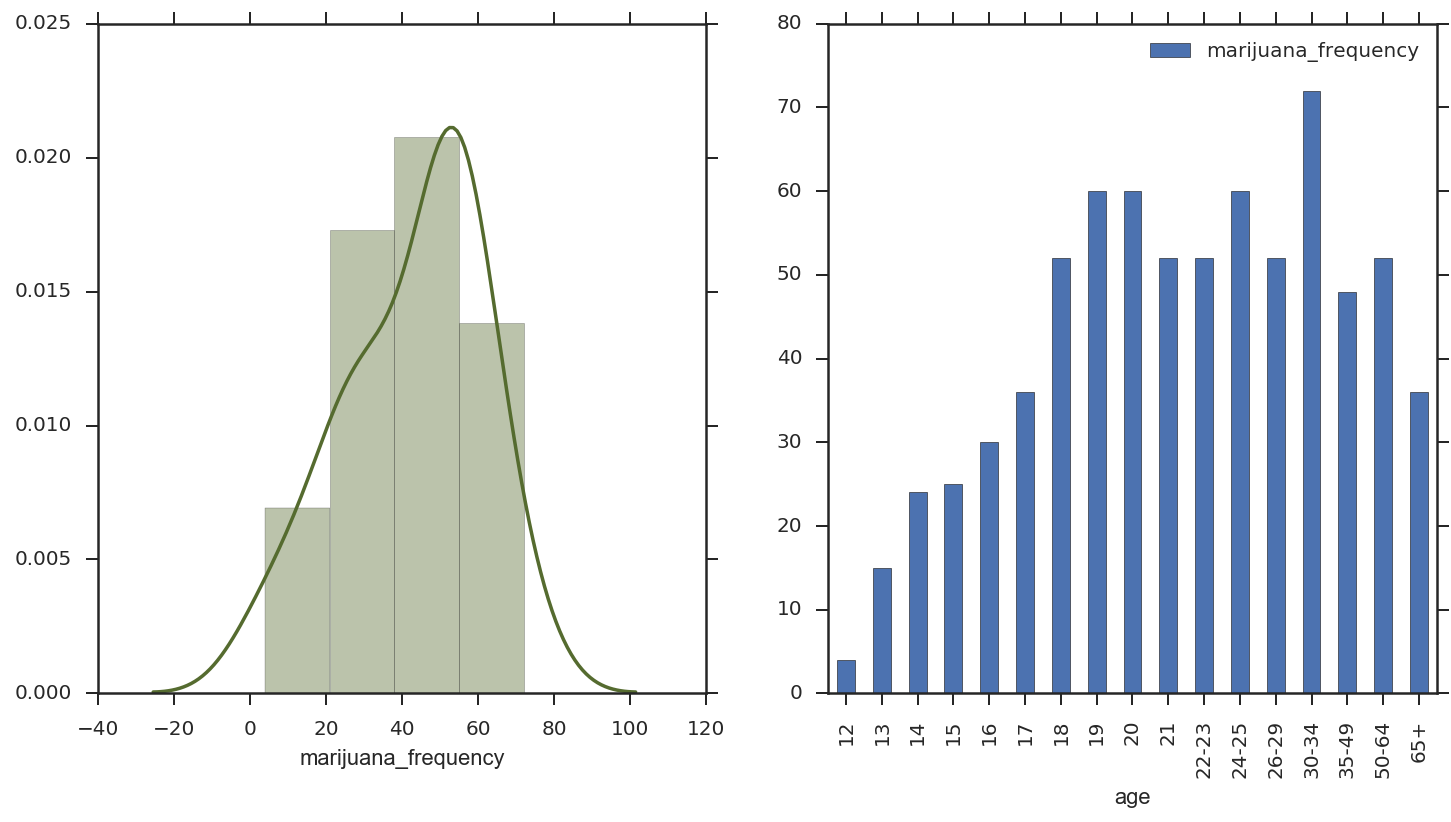

In [486]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(drugs_freq.marijuana_frequency, bins=4, kde=True, color='darkolivegreen', ax=ax[0])
drugs_freq.plot(x='age', y='marijuana_frequency', kind='bar', ax=ax[1])

>Being the 3rd most abused substance, marijuana has a rather normal distribution. A look at the bar chart shows a gradual increase in usage from young and a sustainably high usage among users from 18 years on without any major peaks across age groups

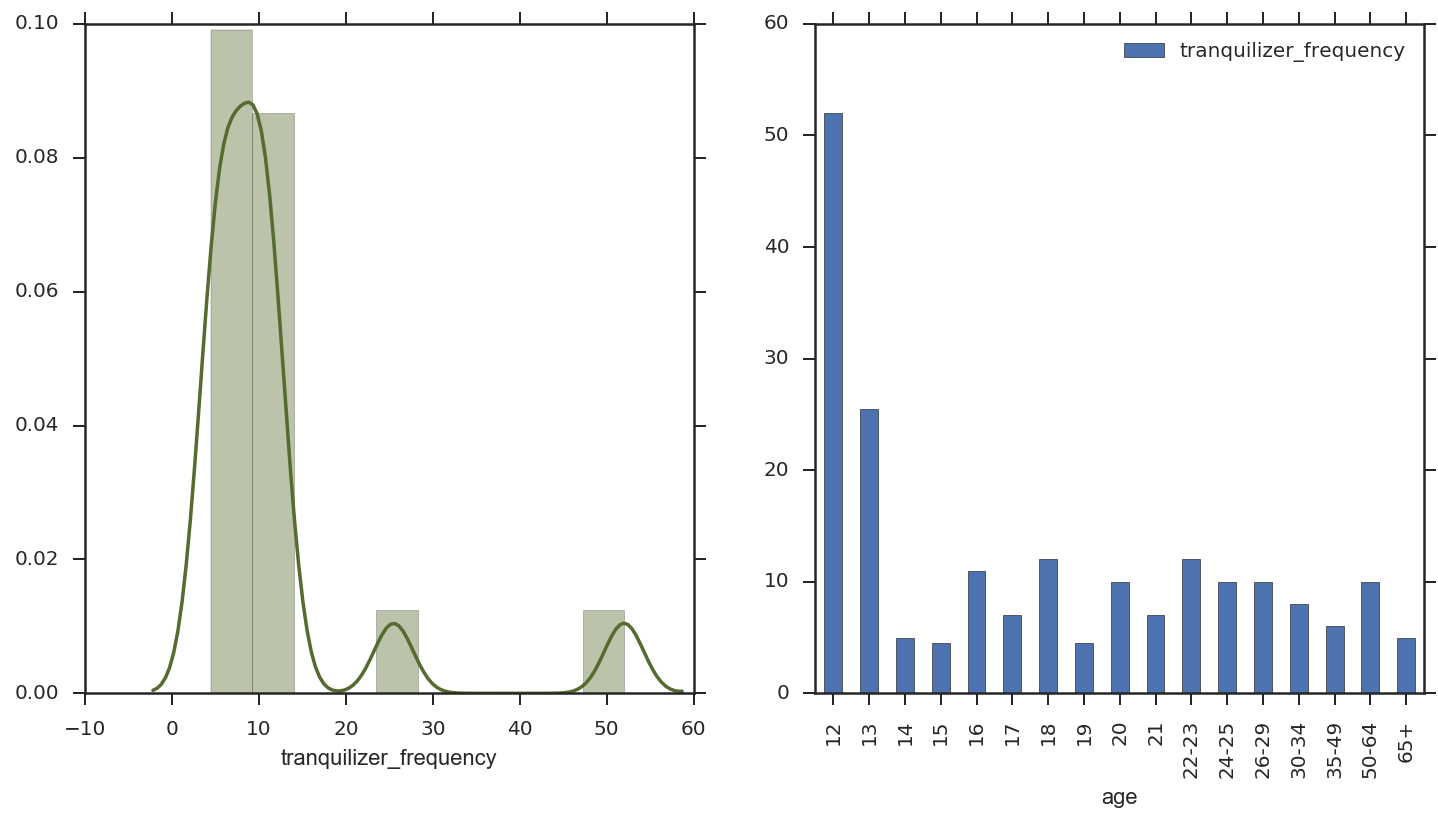

In [488]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(drugs_freq.tranquilizer_frequency, bins=10, kde=True, color='darkolivegreen', ax=ax[0])
drugs_freq.plot(x='age', y='tranquilizer_frequency', kind='bar', ax=ax[1])

>Being the substance with the lowest difference in mean and median scores, I wanted to see if there was any impact on its distribution. To my surprise, I found 2 outliers in its histogram, correlating to the agees of 12 and 13 in the age bar chart.

## Interesting findings from correlation examination of percentages

In [649]:
#Examining pearson correlation scores of variables
pct_corr = drugs_pct.iloc[:, 2:-1].corr()
pct_corr

,alcohol_pct,marijuana_pct,cocaine_pct,crack_pct,heroin_pct,hallucinogen_pct,inhalant_pct,pain_reliever_pct,oxycontin_pct,tranquilizer_pct,stimulant_pct,meth_pct,sedative_pct
alcohol_pct,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana_pct,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine_pct,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack_pct,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin_pct,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen_pct,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant_pct,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain_reliever_pct,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin_pct,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer_pct,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


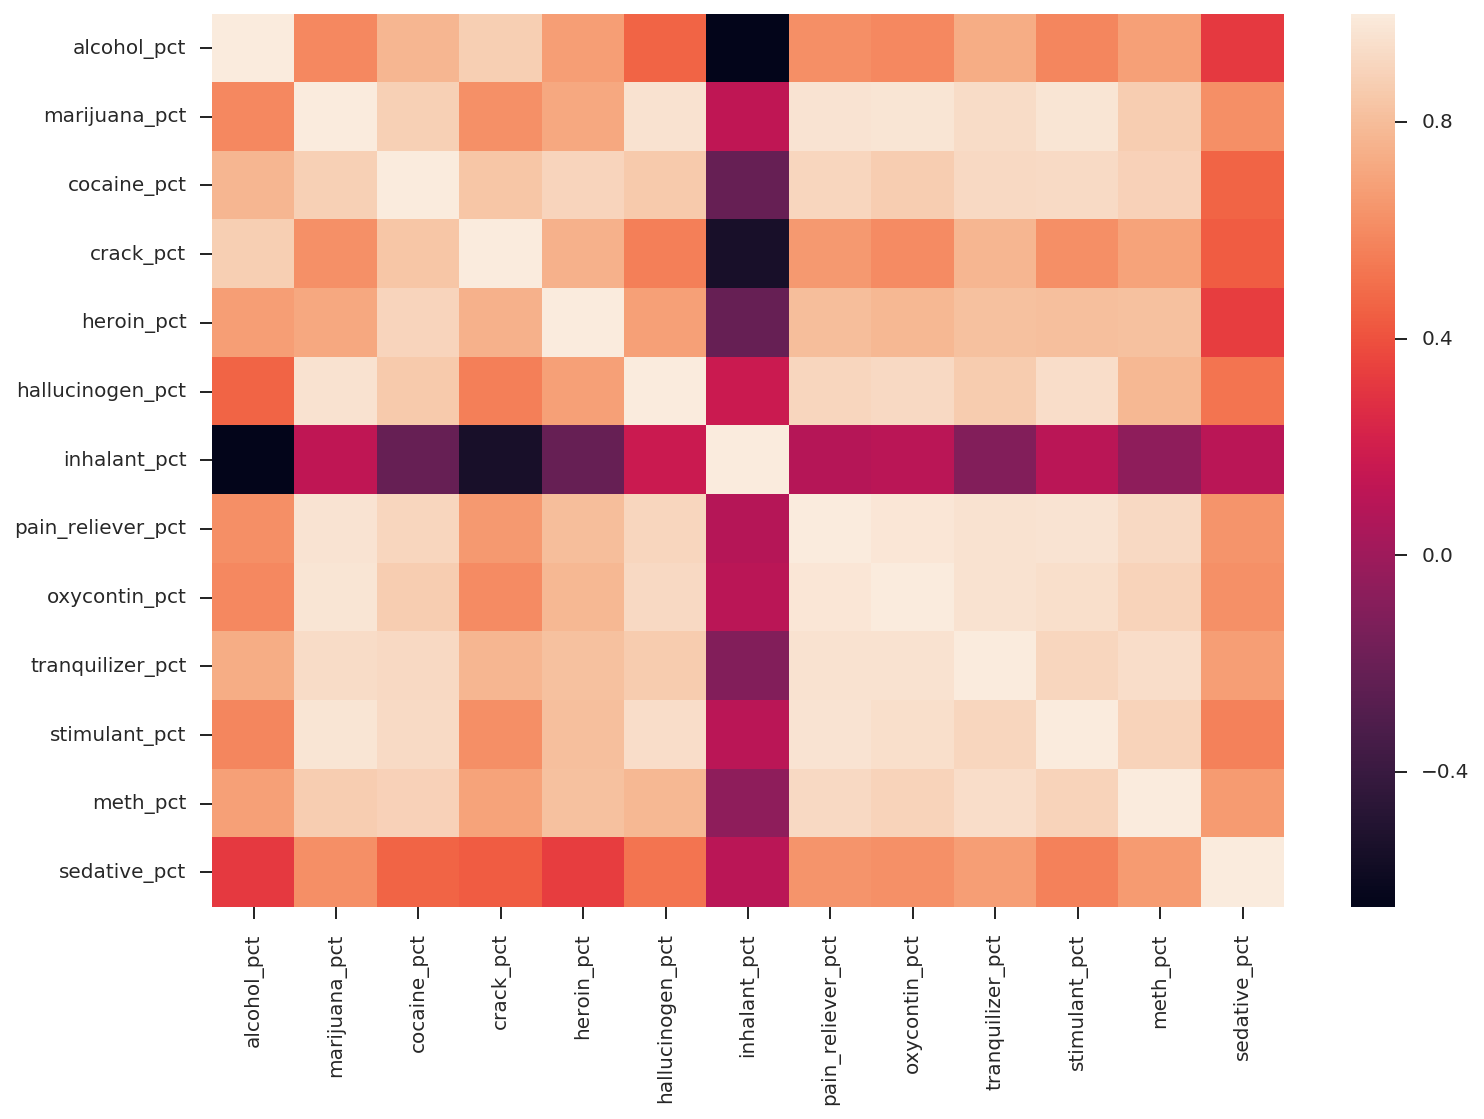

In [650]:
#Heatmap for visualization
plt.figure(figsize = (12,8))
sns.heatmap(pct_corr)

>Looking at the correlation of percentages, I observe several high correlations among various drug classes, the highest being between pain-reliever and oxycontin at 0.97. This is not a surprise as oxycontin is an opoid pain medication and some respondents to the survey might have answered yes to both drug types through class type association. Pain-relievers are also highly correlated with other substances like tranquilizers and stimulants suggesting that these are used mainly for regular treatment as opposed to being used for getting high.

>On the other hand, marijuana and hallucinogens, known substances of abuse, are noted to have high correlation with several of these medication drugs too suggesting that users who abuse marijuana and hallucinogens don't just stop at these 2 drugs but a whole cocktail of side medication too for getting high.

>One surprising finding is the low linear correlation of inhalants with most of the other drug classes. Further investigation will be needed to determine if inhalants have some other form of relationships with the other drug classes.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


- H0: There is no difference in frequency of alcohol usage and marijuana usage
- H1: There is a difference in frequency of alcohol usage and marijuana usage

#### Deliverables
I will report on whether the hypothesis is rejected on a confidence level of 95% by calculating the p-value of a t-test against the alpha of 0.05

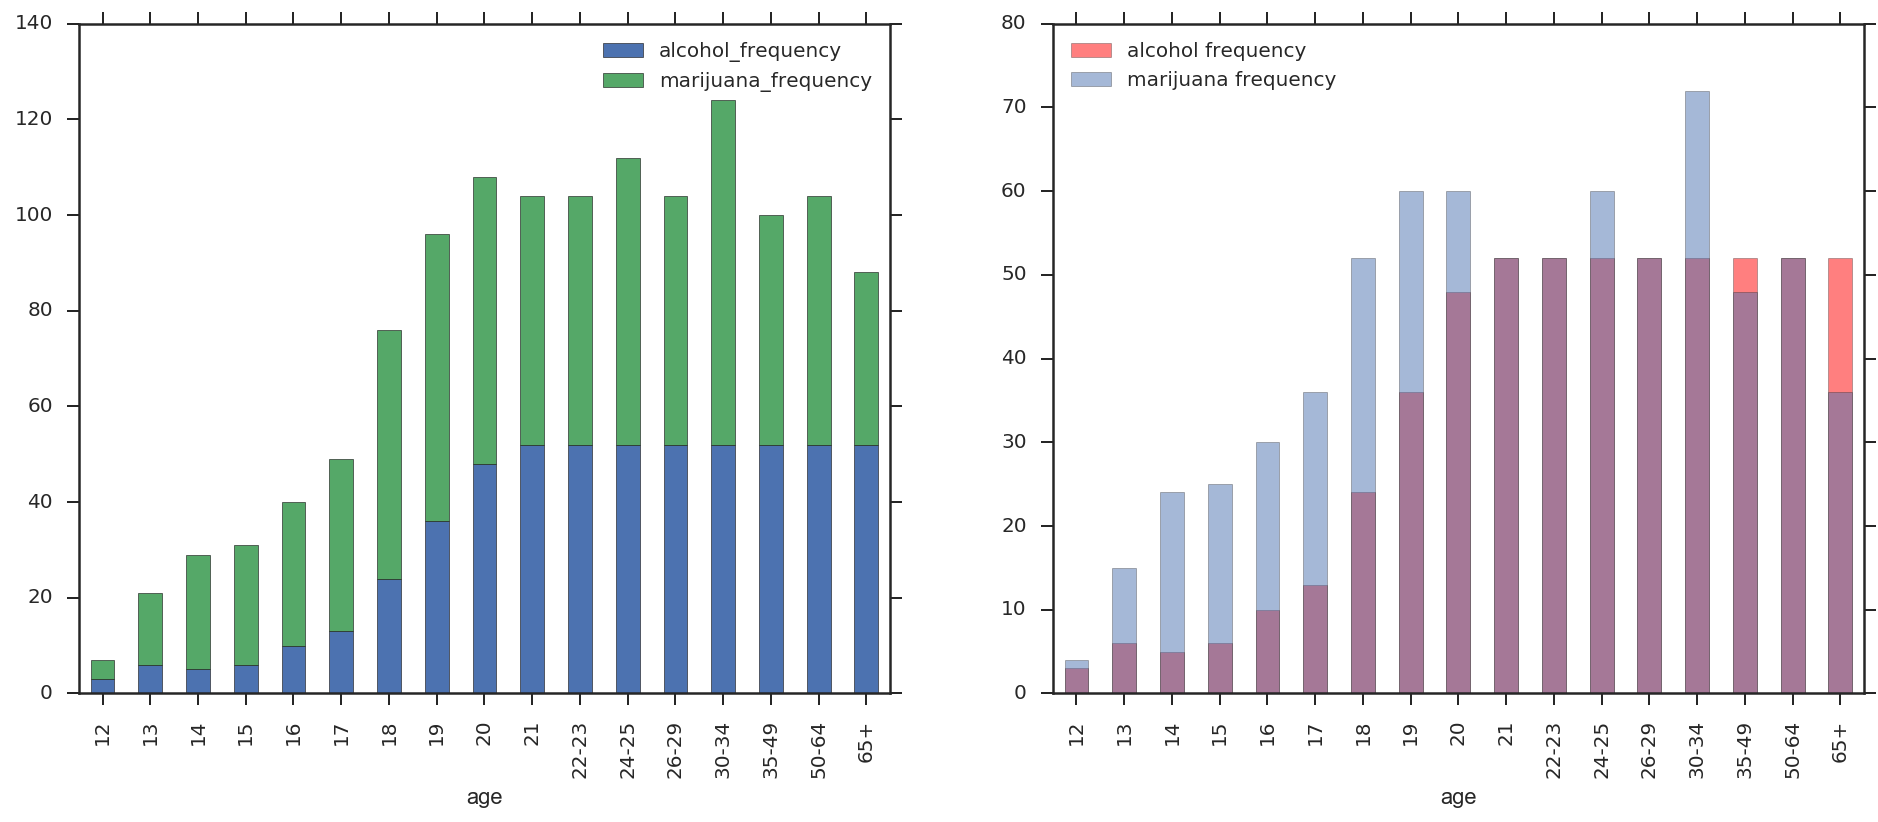

In [647]:
#Reproduced 2 types of plots here for comparison. They are both bar plots comparing alcohol frequency against
#marijuana frequency. The left is a stacked plot while the right is a superimposed one. I much prefer the right one for
#comparison as it is clearer where one variable is more than the other.
fig, axe = plt.subplots(1,2, figsize=(16,6))
drugs_freq.set_index(drugs_freq['age'], drop=True, inplace=True)
drugs_freq[['alcohol_frequency', 'marijuana_frequency']].plot(kind='bar', stacked=True, ax=axe[0])
ax=drugs_freq['alcohol_frequency'].plot(kind='bar', color='red', alpha=0.5, legend=True, label='alcohol frequency', ax=axe[1])
drugs_freq['marijuana_frequency'].plot(kind='bar', ax=ax, alpha=0.5, legend=True, label='marijuana frequency')

#### Visually, the frequency of alcohol and marijuana usage looks to be rather closely mirrored in terms of usage pattern and magnitude, especially in the older age groups.

In [594]:
# Code
alc = drugs_freq['alcohol_frequency']
mari = drugs_freq['marijuana_frequency']
stats.ttest_ind(alc,mari)

Ttest_indResult(statistic=-1.4050418979783086, pvalue=0.169642784061864)

**Report**

>With a t-test statistic of -1.45 and a p-value of 0.16, there is not sufficient evidence at a 95% level of confidence to reject the null hypothesis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [297]:
rate_only = minus_all[['Rate']]
rate_only.describe()

,Rate
count,51.000000
mean,37.000000
std,27.550681
min,4.000000
25%,9.000000
50%,33.000000
75%,64.000000
max,82.000000


### Outlier determination
We will be determining outliers via their distance from the median and classifying them into 2 types.
For reference:
Q1 = 25th percentile
Q3 = 75th percentile
IQR = 75th - 25th percentile or the Interquartile range

- extreme ouliers: beyond lower outer fence **(Q1 - 3*IQR)** or beyond upper outer fence **(Q3 + 3*IQR)**
- mild outliers: beyond lower inner fence **(Q1 - 1.5*IQR)** or beyond upper inner fence **(Q3 + 1.5*IQR)** but not beyond the outer fences


In [298]:
IQR = 64-9
lower_inner_fence_limit = 9 - IQR
upper_inner_fence_limit = 64 + IQR
minor_outlier = rate_only[(rate_only['Rate'] <= lower_inner_fence_limit) & (rate_only['Rate'] >= upper_inner_fence_limit)]
minor_outlier.count()

Rate    0
dtype: int64

>Based on Tukey's fences, we are unable to observe outliers in the Rate variable. The reason why there doesn't seem to be outliers is because the Rate variable is based on a percentage scale of 0-100. Looking at the histogram distribution, we can observe 2 peaks which occur at either ends of the percentage scale which seems to spread over a wide range of datapoints thus minimizing the occurence of outliers

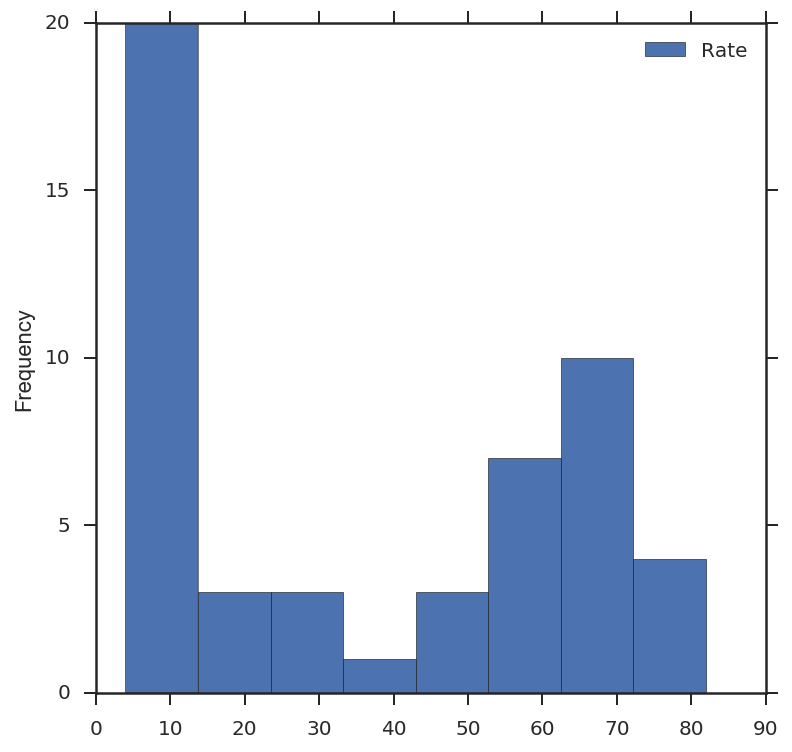

In [307]:
rate_only.plot(kind='hist', bins=8, figsize=(6,6))

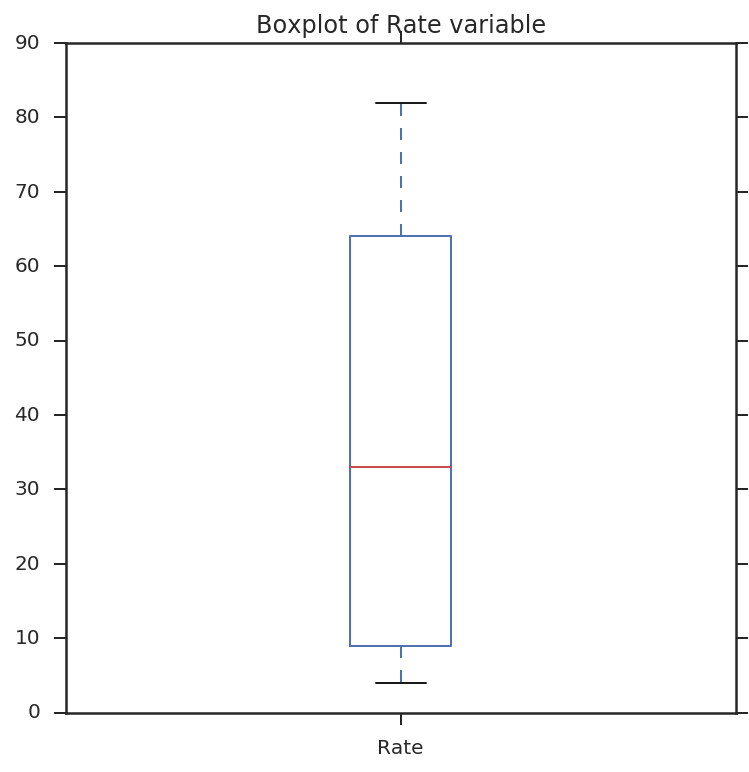

In [293]:
rate_only.plot(kind='box', figsize=(6,6), title='Boxplot of Rate variable')

#### Looking at the box plot, we do not observe any outliers appearing beyond its whiskers. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [308]:
minus_all[['Verbal', 'Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


In [309]:
minus_all[['Verbal', 'Math']].corr()

,Verbal,Math
Verbal,1.000000,0.899909
Math,0.899909,1.000000


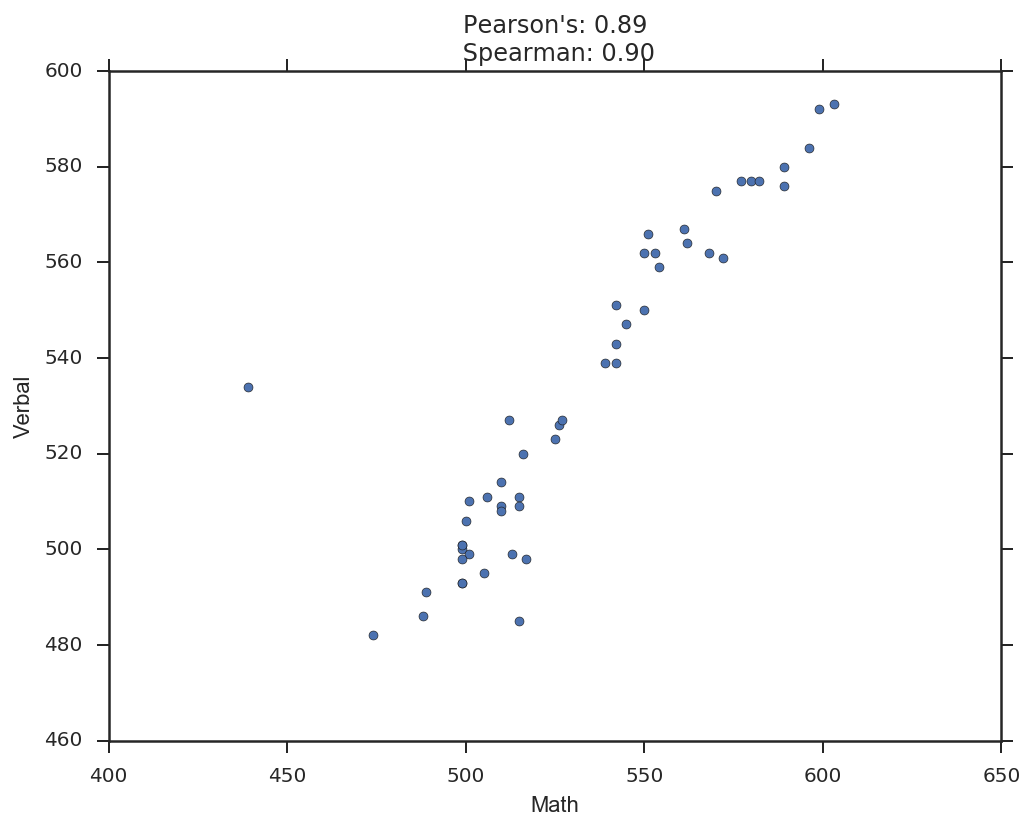

In [314]:
minus_all.plot(x='Math', y='Verbal', kind='scatter', figsize=(8,6), title = "Pearson's: 0.89\n Spearman: 0.90")

>Looking solely at the values, the correlation scores for the spearman method are about 0.01 higher than that of the Pearson method.

>The Spearman correlation measures how 2 variables increase relative to each other in a monotonic function. While Pearson correlation measures how linear a relationship 2 variables have, a high spearman correlation does not necessarily have to be linear, and just looks at whether both variables are increasing or decreasing together. This suggests that a high Pearson correlation score will tend to register a high Spearman correlation score as well while the inverse is not true. 

>The Spearman correlation score is calculated by first ranking the datapoints from both variables according to their magnitude within their variable. The ranks of each variable pair are then compared, taking the difference if any. Eventually, the more both variables increase together in value, meaning the less the difference in the ranks of the values, the higher the spearman correlation score.

>The formula for calculating the Spearman Correlation score is given as:

![Spearman_no_ties](spearmanformula.png)

>where di = difference in paired ranks and n = number of observations



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [324]:
minus_all['Rate_pct']=minus_all['Rate'].rank(pct=True)
minus_all

/Users/timmoti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,State,Rate,Verbal,Math,Difference,Rate_pct
0,CT,82,509,510,-1,1.000000
1,NJ,81,499,513,-14,0.980392
2,MA,79,511,515,-4,0.960784
3,NY,77,495,505,-10,0.941176
4,NH,72,520,516,4,0.921569
5,RI,71,501,499,2,0.892157
6,PA,71,500,499,1,0.892157
7,VT,69,511,506,5,0.852941
8,ME,69,506,500,6,0.852941
9,VA,68,510,501,9,0.823529


In [326]:
minus_all[minus_all['State'] == 'CA'][['Rate_pct']]

,Rate_pct
23,0.558824


### The percentile of California in Rate is 0.558824

### How is percentile related to Spearman Rank Correlation
>The percentile indicates the percentage of datapoints a value is greater than the rest of values in the series. It is also a measure of where in a sorted Series of values you are most likely able to find the value. This sorting of values before assigning a score (percentile) is similar to the method of determining the Spearman Rank correlation where the values of 2 variables are first sorted and assigned a rank before calculating the difference in ranks.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### Why might percentile scoring be useful for dealing with outliers?
>Percentiles range from 0.0-1.0 and is derived relative to the highest value. Plotting a percentile line or bar plot will clearly highlight the presence of outliers as there will be a distinct negative or positive skew in the plots.

In [603]:
#Extracting the alcohol pct column from the split dataframe
alc_pct = drugs_pct[['alcohol_pct']]
alc_pct

,alcohol_pct
0,3.9
1,8.5
2,18.1
3,29.2
4,40.1
5,49.3
6,58.7
7,64.6
8,69.7
9,83.2


In [604]:
#Creating a new percentile column
alc_pct['percentile'] = alc_pct['alcohol_pct'].rank(pct=True)

/Users/timmoti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [634]:
#Setting the index as age for better plotting visualization
alc_pct.set_index(drugs_pct['age'], inplace=True)
alc_pct

,alcohol_pct,percentile
age,,
12,3.9,0.058824
13,8.5,0.117647
14,18.1,0.176471
15,29.2,0.235294
16,40.1,0.294118
17,49.3,0.382353
18,58.7,0.470588
19,64.6,0.529412
20,69.7,0.647059


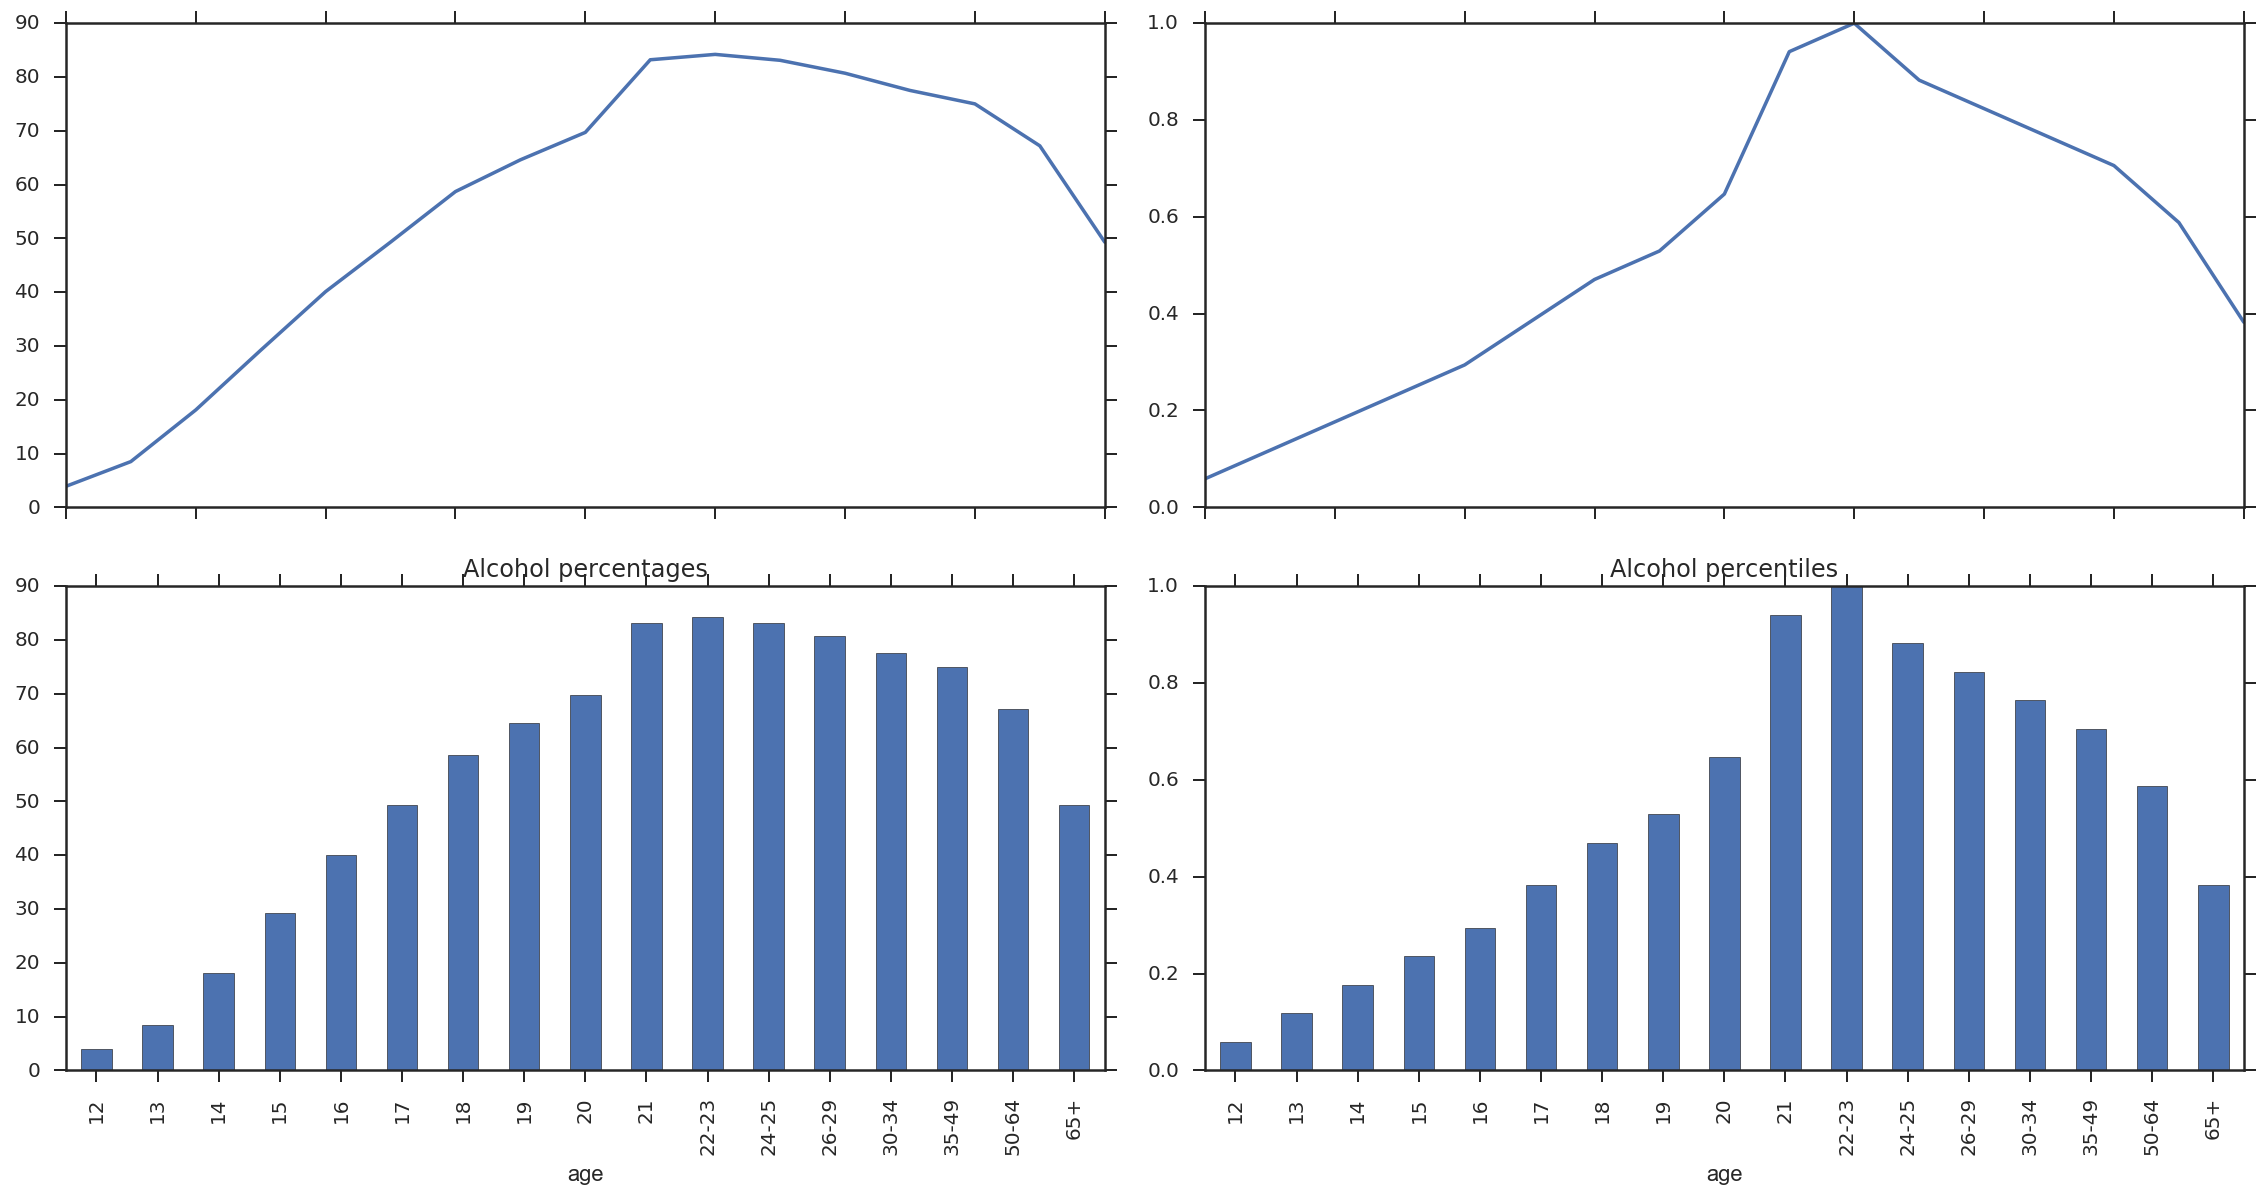

In [648]:
#plotting 4 figures showing line plots and bar plots for better visualization
fig, ax = plt.subplots(2,2, figsize=(16,8))
plt.tight_layout()
alc_pct['alcohol_pct'].plot(ax=ax[0][0], sharex=True)
alc_pct['percentile'].plot(ax=ax[0][1])
alc_pct['alcohol_pct'].plot(kind='bar', ax=ax[1][0], title='Alcohol percentages')
alc_pct['percentile'].plot(kind='bar', ax=ax[1][1], title='Alcohol percentiles')

>The shape of the lines are similar but there are several differences that I've observed the first of which is the scale of the y-axis. Instead of ranging from 0-90 as in the left plot, the range is from 0-1.0 in the percentile plot. 

>Secondly, the line actually touches 1.0 in the percentile plot at datapoint 22-23 as it is from that point, the one with the greatest value, where all the other percentiles are calculated from. 

>The curve also looks convex as it increases in value in the alcohol percentages plots but the increment takes on a concave slope from ages 12-21 in the plots of the percentiles. This suggests the spread of values in the percentiles is larger as the other values are derived relative to the datapoint with the largest value.